In [1]:
#installing dependencies
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install numpy

In [2]:
"""
/*
 * CELL TYPES
 * 0 - cancer
 * 1 - macrophage
 * 2 - CD4
 * 3 - CD8
 *
 * CELL STATES
 * -1 - dead
 * 0 - M0
 * 1 - M1
 * 2 - M2
 * 3 - alive (cancer)
 * 4 - Th
 * 5 - Treg
 * 6 - active (CD8)
 * 7 - suppressed (CD8)
 *
 */
"""
import matplotlib.pyplot as plt

sim_pd1block_base = 'sim_pd1block_base/'
sim_pd1block_high = 'sim_pd1block_high/'
sim_wt_base = 'sim_wt_base/'
sim_wt_high = 'sim_wt_high/'

arr_wt_base = [f'modelPredictions_wt_base_{i}/' for i in range(1, 11)]
arr_wt_high = [f'modelPredictions_wt_high_{i}/' for i in range(1, 11)]
arr_pd1block_base = [f'modelPredictions_pd1block_base_{i}/' for i in range(1, 11)]
arr_pd1block_high = [f'modelPredictions_pd1block_high_{i}/' for i in range(1, 11)]

set_0 = 'set_0/cellLists/' #base
set_1 = 'set_1/cellLists/' #low dp, low kp
set_2 = 'set_2/cellLists/' #low dp, high kp
set_3 = 'set_3/cellLists/' #high dp, low kp
set_4 = 'set_4/cellLists/' #high dp, high kp

set_dirs = [set_0, set_1, set_2, set_3, set_4]

day_dirs = ['day_'+str(i)+'/cells.csv' for i in range(25)]
plt.rcParams['figure.dpi'] = 300

set 0| cc: 17036, m0: 414, m1: 340  m2:  5766, naïve:  166, mem:  1761, exhausted:  1390 th:  230, treg:  864
******************************
set 0| cc: 2698, m0: 48, m1: 76  m2:  242, naïve:  15, mem:  105, exhausted:  83 th:  37, treg:  56
set 1| cc: 20867, m0: 1050, m1: 1662  m2:  3822, naïve:  197, mem:  6102, exhausted:  5358 th:  514, treg:  579
******************************
set 1| cc: 4047, m0: 472, m1: 1177  m2:  1115, naïve:  36, mem:  693, exhausted:  614 th:  249, treg:  171
set 2| cc: 11266, m0: 371, m1: 347  m2:  3592, naïve:  114, mem:  3933, exhausted:  3465 th:  185, treg:  525
******************************
set 2| cc: 3705, m0: 218, m1: 290  m2:  483, naïve:  24, mem:  426, exhausted:  394 th:  84, treg:  60
set 3| cc: 27483, m0: 1035, m1: 581  m2:  6689, naïve:  197, mem:  371, exhausted:  288 th:  405, treg:  989
******************************
set 3| cc: 2792, m0: 476, m1: 203  m2:  762, naïve:  22, mem:  40, exhausted:  31 th:  126, treg:  113
set 4| cc: 13337, m0: 

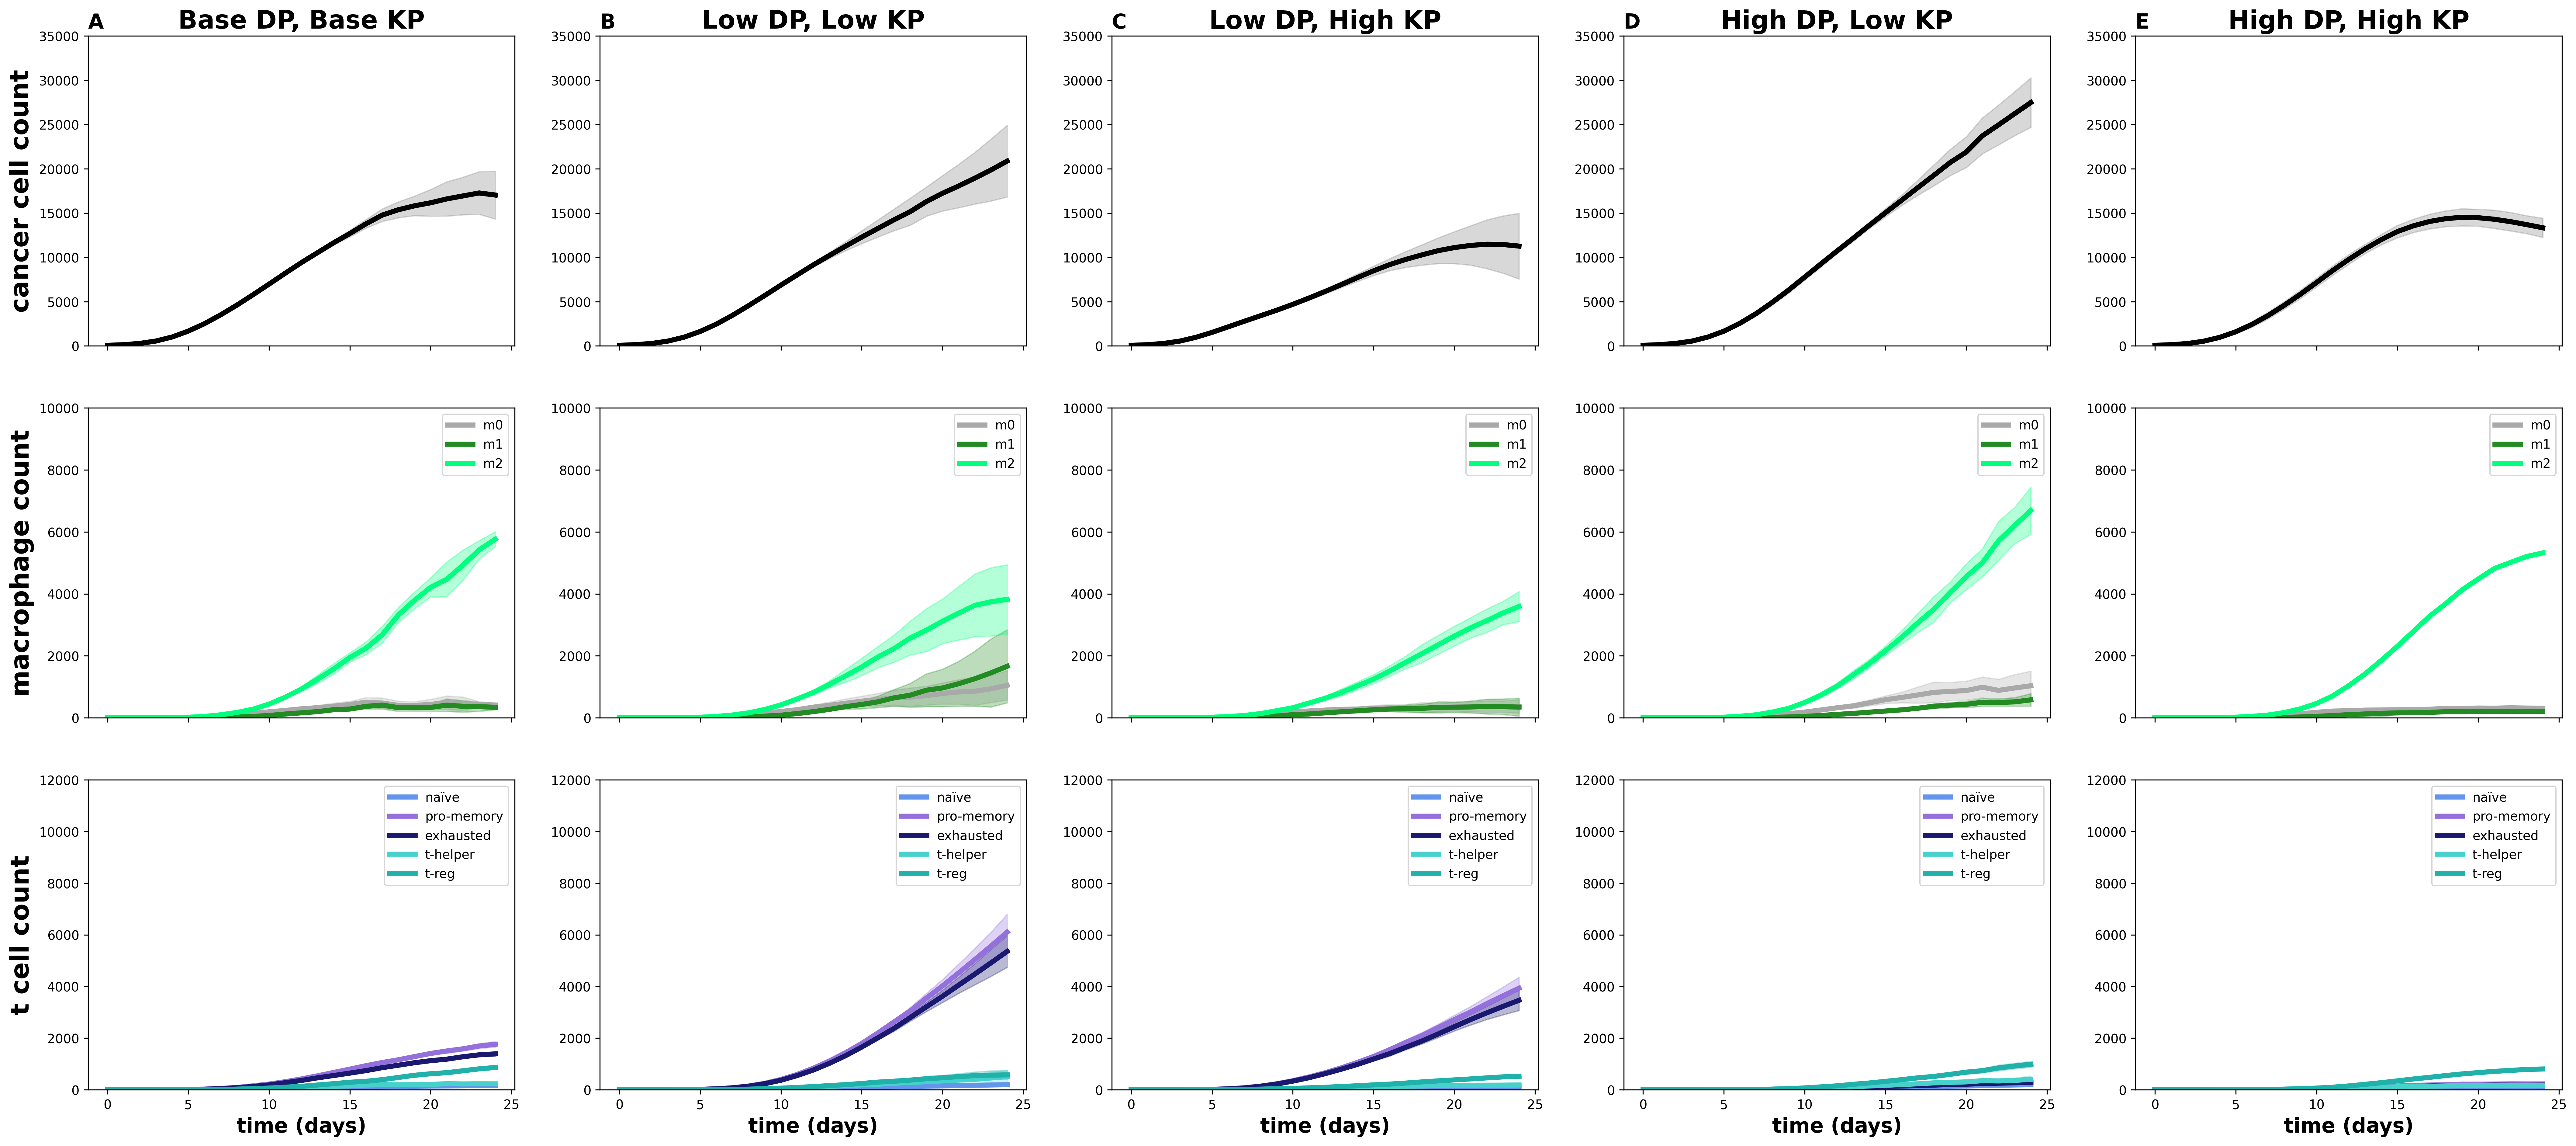

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


np.random.seed(0)
"""
/*
 * CELL TYPES
 * 0 - cancer
 * 1 - macrophage
 * 2 - CD4
 * 3 - CD8
 *
 * CELL STATES
 * -1 - dead
 * 0 - M0
 * 1 - M1
 * 2 - M2
 * 3 - alive (cancer)
 * 4 - Th
 * 5 - Treg
 * 6 - active (CD8)
 * 7 - suppressed (CD8)
 *
 */f
"""
sim_code = sim_pd1block_high
t = [i for i in range(25)]

fig, axes = plt.subplots(3, 5, figsize=(35, 15))
# fig.suptitle('Phenotype State Transition: 12', fontweight='bold', fontsize=22)



#--------------------------set 0---------------------
cc_counts = []
macrophage_counts = []
m0 = []
m1 = []
m2 = []
cd4_counts = []
cd8_counts = []
n = []
m = []
e  = []
th = []
treg = []

for rep in arr_pd1block_high: 
    temp_cc_counts = []
    temp_macrophage_counts = []
    temp_m0 = []
    temp_m1 = []
    temp_m2 = []
    temp_cd4_counts = []
    temp_cd8_counts = []
    temp_n = []
    temp_m = []
    temp_e  = []
    temp_th = []
    temp_treg = [] 
    
    for day in day_dirs: 
        df = pd.read_csv(sim_code+rep+set_dirs[0]+ day,header=None)
        df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
        
        temp_cc_counts.append((df['cellType'] == 0).sum())
        temp_macrophage_counts.append((df['cellType'] == 1).sum())
        temp_cd4_counts.append((df['cellType'] == 2).sum())
        temp_cd8_counts.append((df['cellType'] == 3).sum())

        temp_m0.append(((df['cellType'] == 1) & (df['state'] == '0')).sum())
        temp_m1.append(((df['cellType'] == 1) & (df['state'] == '1')).sum())
        temp_m2.append(((df['cellType'] == 1) & (df['state'] == '2')).sum())

        temp_n.append(((df['cellType'] == 3) & (df['state'] == 'N')).sum())
        temp_m.append(((df['cellType'] == 3) & (df['state'] == 'M')).sum())
        temp_e.append(((df['cellType'] == 3) & (df['state'] == 'E')).sum())

        temp_th.append(((df['cellType'] == 2) & (df['state'] == '4')).sum())
        temp_treg.append(((df['cellType'] == 2) & (df['state'] == '5')).sum())

    cc_counts.append(temp_cc_counts)
    macrophage_counts.append(temp_macrophage_counts)
    cd4_counts.append(temp_cd4_counts)
    cd8_counts.append(temp_cd8_counts)

    m0.append(temp_m0)
    m1.append(temp_m1)
    m2.append(temp_m2)
    
    n.append(temp_n)
    m.append(temp_m)
    e.append(temp_e)

    th.append(temp_th)
    treg.append(temp_treg)

cc_counts = np.array(cc_counts)
macrophage_counts = np.array(macrophage_counts)
cd4_counts = np.array(cd4_counts)
cd8_counts = np.array(cd8_counts)

m0 = np.array(m0)
m1 = np.array(m1)
m2 = np.array(m2)

n = np.array(n)
m = np.array(m)
e = np.array(e)

th = np.array(th)
treg = np.array(treg)

plt.subplot(3, 5, 1)

ub_cc = np.add(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
lb_cc = np.subtract(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
sns.lineplot(x=t, y=np.mean(cc_counts, axis=0), linewidth=4, c='black')    
plt.fill_between(t, ub_cc, lb_cc, color='gray', alpha=0.3, label='Standard Deviation')
plt.ylabel('cancer cell count', fontweight='bold', fontsize=20)
plt.title('Base DP, Base KP', fontweight='bold', fontsize=20)
plt.title('A', fontweight='bold', fontsize=16, loc='left')
plt.ylim([0, 35000])
plt.xticks(visible=False)

plt.subplot(3, 5, 6)
ub_m0 = np.add(np.mean(m0, axis=0), np.std(m0, axis=0))
lb_m0 = np.subtract(np.mean(m0, axis=0), np.std(m0, axis=0))
ub_m1 = np.add(np.mean(m1, axis=0), np.std(m1, axis=0))
lb_m1 = np.subtract(np.mean(m1, axis=0), np.std(m1, axis=0))
ub_m2 = np.add(np.mean(m2, axis=0), np.std(m2, axis=0))
lb_m2 = np.subtract(np.mean(m2, axis=0), np.std(m2, axis=0))

sns.lineplot(x=t, y=np.mean(m0, axis=0),label='m0', linewidth=4, c='darkgrey')
sns.lineplot(x=t, y=np.mean(m1, axis=0), label='m1', linewidth=4, c='forestgreen')
sns.lineplot(x=t, y=np.mean(m2, axis=0), label='m2', linewidth=4, c='springgreen')

plt.fill_between(t, ub_m0, lb_m0, color='darkgrey', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m1, lb_m1, color='forestgreen', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m2, lb_m2, color='springgreen', alpha=0.3, label='Standard Deviation')

plt.ylim([0, 10000])
plt.xticks(visible=False)

plt.ylabel('macrophage count', fontweight='bold', fontsize=20)
plt.subplot(3, 5, 11)

lb_n = np.add(np.mean(n, axis=0), np.std(n, axis=0))
ub_n = np.subtract(np.mean(n, axis=0), np.std(n, axis=0))
lb_m = np.add(np.mean(m, axis=0), np.std(m, axis=0))
ub_m = np.subtract(np.mean(m, axis=0), np.std(m, axis=0))
lb_e = np.add(np.mean(e, axis=0), np.std(e, axis=0))
ub_e = np.subtract(np.mean(e, axis=0), np.std(e, axis=0))
lb_th = np.add(np.mean(th, axis=0), np.std(th, axis=0))
ub_th = np.subtract(np.mean(th, axis=0), np.std(th, axis=0))
lb_treg = np.add(np.mean(treg, axis=0), np.std(treg, axis=0))
ub_treg = np.subtract(np.mean(treg, axis=0), np.std(treg, axis=0))


sns.lineplot(x=t, y=np.mean(n, axis=0), label='naïve', linewidth=4, c='cornflowerblue')
sns.lineplot(x=t, y=np.mean(m, axis=0), label='pro-memory', linewidth=4, c='mediumpurple')
sns.lineplot(x=t, y=np.mean(e, axis=0), label='exhausted', linewidth=4, c='midnightblue')
sns.lineplot(x=t, y=np.mean(th, axis=0), label='t-helper', linewidth=4, c='mediumturquoise')
sns.lineplot(x=t, y=np.mean(treg, axis=0), label='t-reg', linewidth=4, c='lightseagreen')

plt.fill_between(t, ub_n, lb_n, color='cornflowerblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m, lb_m, color='mediumpurple', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_e, lb_e, color='midnightblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_th, lb_th, color='mediumturquoise', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_treg, lb_treg, color='lightseagreen', alpha=0.3, label='Standard Deviation')
plt.ylim([0, 12000])
plt.ylabel('t cell count', fontweight='bold', fontsize=20)
plt.xlabel('time (days)', fontweight='bold', fontsize=16)

print(f'set 0| cc: {np.mean(cc_counts, axis=0)[-1]:.0f}, m0: {np.mean(m0, axis=0)[-1]:.0f}, m1: {np.mean(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.mean(m2, axis=0)[-1]:.0f}, naïve:  {np.mean(n, axis=0)[-1]:.0f}, mem:  {np.mean(m, axis=0)[-1]:.0f}, exhausted:  {np.mean(e, axis=0)[-1]:.0f}', 
      f'th:  {np.mean(th, axis=0)[-1]:.0f}, treg:  {np.mean(treg, axis=0)[-1]:.0f}')
print('*'*30)
print(f'set 0| cc: {np.std(cc_counts, axis=0)[-1]:.0f}, m0: {np.std(m0, axis=0)[-1]:.0f}, m1: {np.std(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.std(m2, axis=0)[-1]:.0f}, naïve:  {np.std(n, axis=0)[-1]:.0f}, mem:  {np.std(m, axis=0)[-1]:.0f}, exhausted:  {np.std(e, axis=0)[-1]:.0f}', 
      f'th:  {np.std(th, axis=0)[-1]:.0f}, treg:  {np.std(treg, axis=0)[-1]:.0f}')
#--END SET 0--------------------------

#--------------SET 1---------------------------
cc_counts = []
macrophage_counts = []
m0 = []
m1 = []
m2 = []
cd4_counts = []
cd8_counts = []
n = []
m = []
e  = []
th = []
treg = []

for rep in arr_pd1block_high: 
    temp_cc_counts = []
    temp_macrophage_counts = []
    temp_m0 = []
    temp_m1 = []
    temp_m2 = []
    temp_cd4_counts = []
    temp_cd8_counts = []
    temp_n = []
    temp_m = []
    temp_e  = []
    temp_th = []
    temp_treg = [] 
    
    for day in day_dirs: 
        df = pd.read_csv(sim_code+rep+set_dirs[1]+ day,header=None)
        df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
        
        temp_cc_counts.append((df['cellType'] == 0).sum())
        temp_macrophage_counts.append((df['cellType'] == 1).sum())
        temp_cd4_counts.append((df['cellType'] == 2).sum())
        temp_cd8_counts.append((df['cellType'] == 3).sum())

        temp_m0.append(((df['cellType'] == 1) & (df['state'] == '0')).sum())
        temp_m1.append(((df['cellType'] == 1) & (df['state'] == '1')).sum())
        temp_m2.append(((df['cellType'] == 1) & (df['state'] == '2')).sum())

        temp_n.append(((df['cellType'] == 3) & (df['state'] == 'N')).sum())
        temp_m.append(((df['cellType'] == 3) & (df['state'] == 'M')).sum())
        temp_e.append(((df['cellType'] == 3) & (df['state'] == 'E')).sum())

        temp_th.append(((df['cellType'] == 2) & (df['state'] == '4')).sum())
        temp_treg.append(((df['cellType'] == 2) & (df['state'] == '5')).sum())

    cc_counts.append(temp_cc_counts)
    macrophage_counts.append(temp_macrophage_counts)
    cd4_counts.append(temp_cd4_counts)
    cd8_counts.append(temp_cd8_counts)

    m0.append(temp_m0)
    m1.append(temp_m1)
    m2.append(temp_m2)
    
    n.append(temp_n)
    m.append(temp_m)
    e.append(temp_e)

    th.append(temp_th)
    treg.append(temp_treg)

cc_counts = np.array(cc_counts)
macrophage_counts = np.array(macrophage_counts)
cd4_counts = np.array(cd4_counts)
cd8_counts = np.array(cd8_counts)

m0 = np.array(m0)
m1 = np.array(m1)
m2 = np.array(m2)

n = np.array(n)
m = np.array(m)
e = np.array(e)

th = np.array(th)
treg = np.array(treg)

plt.subplot(3, 5, 2)

ub_cc = np.add(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
lb_cc = np.subtract(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
sns.lineplot(x=t, y=np.mean(cc_counts, axis=0), linewidth=4, c='black')    
plt.fill_between(t, ub_cc, lb_cc, color='gray', alpha=0.3, label='Standard Deviation')
plt.title('Low DP, Low KP', fontweight='bold', fontsize=20)
plt.title('B', fontweight='bold', fontsize=16, loc='left')
plt.ylim([0, 35000])
plt.xticks(visible=False)

plt.subplot(3, 5, 7)
ub_m0 = np.add(np.mean(m0, axis=0), np.std(m0, axis=0))
lb_m0 = np.subtract(np.mean(m0, axis=0), np.std(m0, axis=0))
ub_m1 = np.add(np.mean(m1, axis=0), np.std(m1, axis=0))
lb_m1 = np.subtract(np.mean(m1, axis=0), np.std(m1, axis=0))
ub_m2 = np.add(np.mean(m2, axis=0), np.std(m2, axis=0))
lb_m2 = np.subtract(np.mean(m2, axis=0), np.std(m2, axis=0))

sns.lineplot(x=t, y=np.mean(m0, axis=0),label='m0', linewidth=4, c='darkgrey')
sns.lineplot(x=t, y=np.mean(m1, axis=0), label='m1', linewidth=4, c='forestgreen')
sns.lineplot(x=t, y=np.mean(m2, axis=0), label='m2', linewidth=4, c='springgreen')

plt.fill_between(t, ub_m0, lb_m0, color='darkgrey', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m1, lb_m1, color='forestgreen', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m2, lb_m2, color='springgreen', alpha=0.3, label='Standard Deviation')

plt.ylim([0, 10000])
plt.xticks(visible=False)

plt.subplot(3, 5, 12)
lb_n = np.add(np.mean(n, axis=0), np.std(n, axis=0))
ub_n = np.subtract(np.mean(n, axis=0), np.std(n, axis=0))
lb_m = np.add(np.mean(m, axis=0), np.std(m, axis=0))
ub_m = np.subtract(np.mean(m, axis=0), np.std(m, axis=0))
lb_e = np.add(np.mean(e, axis=0), np.std(e, axis=0))
ub_e = np.subtract(np.mean(e, axis=0), np.std(e, axis=0))
lb_th = np.add(np.mean(th, axis=0), np.std(th, axis=0))
ub_th = np.subtract(np.mean(th, axis=0), np.std(th, axis=0))
lb_treg = np.add(np.mean(treg, axis=0), np.std(treg, axis=0))
ub_treg = np.subtract(np.mean(treg, axis=0), np.std(treg, axis=0))


sns.lineplot(x=t, y=np.mean(n, axis=0), label='naïve', linewidth=4, c='cornflowerblue')
sns.lineplot(x=t, y=np.mean(m, axis=0), label='pro-memory', linewidth=4, c='mediumpurple')
sns.lineplot(x=t, y=np.mean(e, axis=0), label='exhausted', linewidth=4, c='midnightblue')
sns.lineplot(x=t, y=np.mean(th, axis=0), label='t-helper', linewidth=4, c='mediumturquoise')
sns.lineplot(x=t, y=np.mean(treg, axis=0), label='t-reg', linewidth=4, c='lightseagreen')

plt.fill_between(t, ub_n, lb_n, color='cornflowerblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m, lb_m, color='mediumpurple', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_e, lb_e, color='midnightblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_th, lb_th, color='mediumturquoise', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_treg, lb_treg, color='lightseagreen', alpha=0.3, label='Standard Deviation')
plt.ylim([0, 12000])
plt.xlabel('time (days)', fontweight='bold', fontsize=16)

print(f'set 1| cc: {np.mean(cc_counts, axis=0)[-1]:.0f}, m0: {np.mean(m0, axis=0)[-1]:.0f}, m1: {np.mean(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.mean(m2, axis=0)[-1]:.0f}, naïve:  {np.mean(n, axis=0)[-1]:.0f}, mem:  {np.mean(m, axis=0)[-1]:.0f}, exhausted:  {np.mean(e, axis=0)[-1]:.0f}', 
      f'th:  {np.mean(th, axis=0)[-1]:.0f}, treg:  {np.mean(treg, axis=0)[-1]:.0f}')
print('*'*30)
print(f'set 1| cc: {np.std(cc_counts, axis=0)[-1]:.0f}, m0: {np.std(m0, axis=0)[-1]:.0f}, m1: {np.std(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.std(m2, axis=0)[-1]:.0f}, naïve:  {np.std(n, axis=0)[-1]:.0f}, mem:  {np.std(m, axis=0)[-1]:.0f}, exhausted:  {np.std(e, axis=0)[-1]:.0f}', 
      f'th:  {np.std(th, axis=0)[-1]:.0f}, treg:  {np.std(treg, axis=0)[-1]:.0f}')
#------------------------------------------------END SET 1-------------------------------------------


#------------------------------------------------SET 2-----------------------------------------------
cc_counts = []
macrophage_counts = []
m0 = []
m1 = []
m2 = []
cd4_counts = []
cd8_counts = []
n = []
m = []
e  = []
th = []
treg = []

for rep in arr_pd1block_high: 
    temp_cc_counts = []
    temp_macrophage_counts = []
    temp_m0 = []
    temp_m1 = []
    temp_m2 = []
    temp_cd4_counts = []
    temp_cd8_counts = []
    temp_n = []
    temp_m = []
    temp_e  = []
    temp_th = []
    temp_treg = [] 
    
    for day in day_dirs: 
        df = pd.read_csv(sim_code+rep+set_dirs[2]+ day,header=None)
        df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
        
        temp_cc_counts.append((df['cellType'] == 0).sum())
        temp_macrophage_counts.append((df['cellType'] == 1).sum())
        temp_cd4_counts.append((df['cellType'] == 2).sum())
        temp_cd8_counts.append((df['cellType'] == 3).sum())

        temp_m0.append(((df['cellType'] == 1) & (df['state'] == '0')).sum())
        temp_m1.append(((df['cellType'] == 1) & (df['state'] == '1')).sum())
        temp_m2.append(((df['cellType'] == 1) & (df['state'] == '2')).sum())

        temp_n.append(((df['cellType'] == 3) & (df['state'] == 'N')).sum())
        temp_m.append(((df['cellType'] == 3) & (df['state'] == 'M')).sum())
        temp_e.append(((df['cellType'] == 3) & (df['state'] == 'E')).sum())

        temp_th.append(((df['cellType'] == 2) & (df['state'] == '4')).sum())
        temp_treg.append(((df['cellType'] == 2) & (df['state'] == '5')).sum())

    cc_counts.append(temp_cc_counts)
    macrophage_counts.append(temp_macrophage_counts)
    cd4_counts.append(temp_cd4_counts)
    cd8_counts.append(temp_cd8_counts)

    m0.append(temp_m0)
    m1.append(temp_m1)
    m2.append(temp_m2)
    
    n.append(temp_n)
    m.append(temp_m)
    e.append(temp_e)

    th.append(temp_th)
    treg.append(temp_treg)

cc_counts = np.array(cc_counts)
macrophage_counts = np.array(macrophage_counts)
cd4_counts = np.array(cd4_counts)
cd8_counts = np.array(cd8_counts)

m0 = np.array(m0)
m1 = np.array(m1)
m2 = np.array(m2)

n = np.array(n)
m = np.array(m)
e = np.array(e)

th = np.array(th)
treg = np.array(treg)

plt.subplot(3, 5, 3)

ub_cc = np.add(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
lb_cc = np.subtract(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
sns.lineplot(x=t, y=np.mean(cc_counts, axis=0), linewidth=4, c='black')    
plt.fill_between(t, ub_cc, lb_cc, color='gray', alpha=0.3, label='Standard Deviation')
plt.title('Low DP, High KP', fontweight='bold', fontsize=20)
plt.title('C', fontweight='bold', fontsize=16, loc='left')
plt.ylim([0, 35000])
plt.xticks(visible=False)

plt.subplot(3, 5, 8)
ub_m0 = np.add(np.mean(m0, axis=0), np.std(m0, axis=0))
lb_m0 = np.subtract(np.mean(m0, axis=0), np.std(m0, axis=0))
ub_m1 = np.add(np.mean(m1, axis=0), np.std(m1, axis=0))
lb_m1 = np.subtract(np.mean(m1, axis=0), np.std(m1, axis=0))
ub_m2 = np.add(np.mean(m2, axis=0), np.std(m2, axis=0))
lb_m2 = np.subtract(np.mean(m2, axis=0), np.std(m2, axis=0))

sns.lineplot(x=t, y=np.mean(m0, axis=0),label='m0', linewidth=4, c='darkgrey')
sns.lineplot(x=t, y=np.mean(m1, axis=0), label='m1', linewidth=4, c='forestgreen')
sns.lineplot(x=t, y=np.mean(m2, axis=0), label='m2', linewidth=4, c='springgreen')

plt.fill_between(t, ub_m0, lb_m0, color='darkgrey', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m1, lb_m1, color='forestgreen', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m2, lb_m2, color='springgreen', alpha=0.3, label='Standard Deviation')

plt.ylim([0, 10000])
plt.xticks(visible=False)

plt.subplot(3, 5, 13)
lb_n = np.add(np.mean(n, axis=0), np.std(n, axis=0))
ub_n = np.subtract(np.mean(n, axis=0), np.std(n, axis=0))
lb_m = np.add(np.mean(m, axis=0), np.std(m, axis=0))
ub_m = np.subtract(np.mean(m, axis=0), np.std(m, axis=0))
lb_e = np.add(np.mean(e, axis=0), np.std(e, axis=0))
ub_e = np.subtract(np.mean(e, axis=0), np.std(e, axis=0))
lb_th = np.add(np.mean(th, axis=0), np.std(th, axis=0))
ub_th = np.subtract(np.mean(th, axis=0), np.std(th, axis=0))
lb_treg = np.add(np.mean(treg, axis=0), np.std(treg, axis=0))
ub_treg = np.subtract(np.mean(treg, axis=0), np.std(treg, axis=0))


sns.lineplot(x=t, y=np.mean(n, axis=0), label='naïve', linewidth=4, c='cornflowerblue')
sns.lineplot(x=t, y=np.mean(m, axis=0), label='pro-memory', linewidth=4, c='mediumpurple')
sns.lineplot(x=t, y=np.mean(e, axis=0), label='exhausted', linewidth=4, c='midnightblue')
sns.lineplot(x=t, y=np.mean(th, axis=0), label='t-helper', linewidth=4, c='mediumturquoise')
sns.lineplot(x=t, y=np.mean(treg, axis=0), label='t-reg', linewidth=4, c='lightseagreen')

plt.fill_between(t, ub_n, lb_n, color='cornflowerblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m, lb_m, color='mediumpurple', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_e, lb_e, color='midnightblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_th, lb_th, color='mediumturquoise', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_treg, lb_treg, color='lightseagreen', alpha=0.3, label='Standard Deviation')
plt.ylim([0, 12000])
plt.xlabel('time (days)', fontweight='bold', fontsize=16)

print(f'set 2| cc: {np.mean(cc_counts, axis=0)[-1]:.0f}, m0: {np.mean(m0, axis=0)[-1]:.0f}, m1: {np.mean(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.mean(m2, axis=0)[-1]:.0f}, naïve:  {np.mean(n, axis=0)[-1]:.0f}, mem:  {np.mean(m, axis=0)[-1]:.0f}, exhausted:  {np.mean(e, axis=0)[-1]:.0f}', 
      f'th:  {np.mean(th, axis=0)[-1]:.0f}, treg:  {np.mean(treg, axis=0)[-1]:.0f}')
print('*'*30)
print(f'set 2| cc: {np.std(cc_counts, axis=0)[-1]:.0f}, m0: {np.std(m0, axis=0)[-1]:.0f}, m1: {np.std(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.std(m2, axis=0)[-1]:.0f}, naïve:  {np.std(n, axis=0)[-1]:.0f}, mem:  {np.std(m, axis=0)[-1]:.0f}, exhausted:  {np.std(e, axis=0)[-1]:.0f}', 
      f'th:  {np.std(th, axis=0)[-1]:.0f}, treg:  {np.std(treg, axis=0)[-1]:.0f}')

#------------------------END SET 2----------------------------------------------------

#---------------------------------SET 3-------------------------------------------------
cc_counts = []
macrophage_counts = []
m0 = []
m1 = []
m2 = []
cd4_counts = []
cd8_counts = []
n = []
m = []
e  = []
th = []
treg = []

for rep in arr_pd1block_high: 
    temp_cc_counts = []
    temp_macrophage_counts = []
    temp_m0 = []
    temp_m1 = []
    temp_m2 = []
    temp_cd4_counts = []
    temp_cd8_counts = []
    temp_n = []
    temp_m = []
    temp_e  = []
    temp_th = []
    temp_treg = [] 
    
    for day in day_dirs: 
        df = pd.read_csv(sim_code+rep+set_dirs[3]+ day,header=None)
        df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
        
        temp_cc_counts.append((df['cellType'] == 0).sum())
        temp_macrophage_counts.append((df['cellType'] == 1).sum())
        temp_cd4_counts.append((df['cellType'] == 2).sum())
        temp_cd8_counts.append((df['cellType'] == 3).sum())

        temp_m0.append(((df['cellType'] == 1) & (df['state'] == '0')).sum())
        temp_m1.append(((df['cellType'] == 1) & (df['state'] == '1')).sum())
        temp_m2.append(((df['cellType'] == 1) & (df['state'] == '2')).sum())

        temp_n.append(((df['cellType'] == 3) & (df['state'] == 'N')).sum())
        temp_m.append(((df['cellType'] == 3) & (df['state'] == 'M')).sum())
        temp_e.append(((df['cellType'] == 3) & (df['state'] == 'E')).sum())

        temp_th.append(((df['cellType'] == 2) & (df['state'] == '4')).sum())
        temp_treg.append(((df['cellType'] == 2) & (df['state'] == '5')).sum())

    cc_counts.append(temp_cc_counts)
    macrophage_counts.append(temp_macrophage_counts)
    cd4_counts.append(temp_cd4_counts)
    cd8_counts.append(temp_cd8_counts)

    m0.append(temp_m0)
    m1.append(temp_m1)
    m2.append(temp_m2)
    
    n.append(temp_n)
    m.append(temp_m)
    e.append(temp_e)

    th.append(temp_th)
    treg.append(temp_treg)

cc_counts = np.array(cc_counts)
macrophage_counts = np.array(macrophage_counts)
cd4_counts = np.array(cd4_counts)
cd8_counts = np.array(cd8_counts)

m0 = np.array(m0)
m1 = np.array(m1)
m2 = np.array(m2)

n = np.array(n)
m = np.array(m)
e = np.array(e)

th = np.array(th)
treg = np.array(treg)

plt.subplot(3, 5, 4)

ub_cc = np.add(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
lb_cc = np.subtract(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
sns.lineplot(x=t, y=np.mean(cc_counts, axis=0), linewidth=4, c='black')    
plt.fill_between(t, ub_cc, lb_cc, color='gray', alpha=0.3, label='Standard Deviation')
plt.title('High DP, Low KP', fontweight='bold', fontsize=20)
plt.title('D', fontweight='bold', fontsize=16, loc='left')
plt.ylim([0, 35000])
plt.xticks(visible=False)

plt.subplot(3, 5, 9)
ub_m0 = np.add(np.mean(m0, axis=0), np.std(m0, axis=0))
lb_m0 = np.subtract(np.mean(m0, axis=0), np.std(m0, axis=0))
ub_m1 = np.add(np.mean(m1, axis=0), np.std(m1, axis=0))
lb_m1 = np.subtract(np.mean(m1, axis=0), np.std(m1, axis=0))
ub_m2 = np.add(np.mean(m2, axis=0), np.std(m2, axis=0))
lb_m2 = np.subtract(np.mean(m2, axis=0), np.std(m2, axis=0))

sns.lineplot(x=t, y=np.mean(m0, axis=0),label='m0', linewidth=4, c='darkgrey')
sns.lineplot(x=t, y=np.mean(m1, axis=0), label='m1', linewidth=4, c='forestgreen')
sns.lineplot(x=t, y=np.mean(m2, axis=0), label='m2', linewidth=4, c='springgreen')

plt.fill_between(t, ub_m0, lb_m0, color='darkgrey', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m1, lb_m1, color='forestgreen', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m2, lb_m2, color='springgreen', alpha=0.3, label='Standard Deviation')

plt.ylim([0, 10000])
plt.xticks(visible=False)

plt.subplot(3, 5, 14)
lb_n = np.add(np.mean(n, axis=0), np.std(n, axis=0))
ub_n = np.subtract(np.mean(n, axis=0), np.std(n, axis=0))
lb_m = np.add(np.mean(m, axis=0), np.std(m, axis=0))
ub_m = np.subtract(np.mean(m, axis=0), np.std(m, axis=0))
lb_e = np.add(np.mean(e, axis=0), np.std(e, axis=0))
ub_e = np.subtract(np.mean(e, axis=0), np.std(e, axis=0))
lb_th = np.add(np.mean(th, axis=0), np.std(th, axis=0))
ub_th = np.subtract(np.mean(th, axis=0), np.std(th, axis=0))
lb_treg = np.add(np.mean(treg, axis=0), np.std(treg, axis=0))
ub_treg = np.subtract(np.mean(treg, axis=0), np.std(treg, axis=0))


sns.lineplot(x=t, y=np.mean(n, axis=0), label='naïve', linewidth=4, c='cornflowerblue')
sns.lineplot(x=t, y=np.mean(m, axis=0), label='pro-memory', linewidth=4, c='mediumpurple')
sns.lineplot(x=t, y=np.mean(e, axis=0), label='exhausted', linewidth=4, c='midnightblue')
sns.lineplot(x=t, y=np.mean(th, axis=0), label='t-helper', linewidth=4, c='mediumturquoise')
sns.lineplot(x=t, y=np.mean(treg, axis=0), label='t-reg', linewidth=4, c='lightseagreen')

plt.fill_between(t, ub_n, lb_n, color='cornflowerblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m, lb_m, color='mediumpurple', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_e, lb_e, color='midnightblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_th, lb_th, color='mediumturquoise', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_treg, lb_treg, color='lightseagreen', alpha=0.3, label='Standard Deviation')
plt.ylim([0, 12000])
plt.xlabel('time (days)', fontweight='bold', fontsize=16)


print(f'set 3| cc: {np.mean(cc_counts, axis=0)[-1]:.0f}, m0: {np.mean(m0, axis=0)[-1]:.0f}, m1: {np.mean(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.mean(m2, axis=0)[-1]:.0f}, naïve:  {np.mean(n, axis=0)[-1]:.0f}, mem:  {np.mean(m, axis=0)[-1]:.0f}, exhausted:  {np.mean(e, axis=0)[-1]:.0f}', 
      f'th:  {np.mean(th, axis=0)[-1]:.0f}, treg:  {np.mean(treg, axis=0)[-1]:.0f}')
print('*'*30)
print(f'set 3| cc: {np.std(cc_counts, axis=0)[-1]:.0f}, m0: {np.std(m0, axis=0)[-1]:.0f}, m1: {np.std(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.std(m2, axis=0)[-1]:.0f}, naïve:  {np.std(n, axis=0)[-1]:.0f}, mem:  {np.std(m, axis=0)[-1]:.0f}, exhausted:  {np.std(e, axis=0)[-1]:.0f}', 
      f'th:  {np.std(th, axis=0)[-1]:.0f}, treg:  {np.std(treg, axis=0)[-1]:.0f}')
#------------------------------------END SET 3----------------------------------

#-----------------------------------------SET 4----------------------------------
cc_counts = []
macrophage_counts = []
m0 = []
m1 = []
m2 = []
cd4_counts = []
cd8_counts = []
n = []
m = []
e  = []
th = []
treg = []

for rep in arr_pd1block_high:  
    temp_cc_counts = []
    temp_macrophage_counts = []
    temp_m0 = []
    temp_m1 = []
    temp_m2 = []
    temp_cd4_counts = []
    temp_cd8_counts = []
    temp_n = []
    temp_m = []
    temp_e  = []
    temp_th = []
    temp_treg = [] 
    
    for day in day_dirs: 
        df = pd.read_csv(sim_code+rep+set_dirs[4]+ day,header=None)
        df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
        
        temp_cc_counts.append((df['cellType'] == 0).sum())
        temp_macrophage_counts.append((df['cellType'] == 1).sum())
        temp_cd4_counts.append((df['cellType'] == 2).sum())
        temp_cd8_counts.append((df['cellType'] == 3).sum())

        temp_m0.append(((df['cellType'] == 1) & (df['state'] == '0')).sum())
        temp_m1.append(((df['cellType'] == 1) & (df['state'] == '1')).sum())
        temp_m2.append(((df['cellType'] == 1) & (df['state'] == '2')).sum())

        temp_n.append(((df['cellType'] == 3) & (df['state'] == 'N')).sum())
        temp_m.append(((df['cellType'] == 3) & (df['state'] == 'M')).sum())
        temp_e.append(((df['cellType'] == 3) & (df['state'] == 'E')).sum())

        temp_th.append(((df['cellType'] == 2) & (df['state'] == '4')).sum())
        temp_treg.append(((df['cellType'] == 2) & (df['state'] == '5')).sum())

    cc_counts.append(temp_cc_counts)
    macrophage_counts.append(temp_macrophage_counts)
    cd4_counts.append(temp_cd4_counts)
    cd8_counts.append(temp_cd8_counts)

    m0.append(temp_m0)
    m1.append(temp_m1)
    m2.append(temp_m2)
    
    n.append(temp_n)
    m.append(temp_m)
    e.append(temp_e)

    th.append(temp_th)
    treg.append(temp_treg)

cc_counts = np.array(cc_counts)
macrophage_counts = np.array(macrophage_counts)
cd4_counts = np.array(cd4_counts)
cd8_counts = np.array(cd8_counts)

m0 = np.array(m0)
m1 = np.array(m1)
m2 = np.array(m2)

n = np.array(n)
m = np.array(m)
e = np.array(e)

th = np.array(th)
treg = np.array(treg)

plt.subplot(3, 5, 5)

ub_cc = np.add(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
lb_cc = np.subtract(np.mean(cc_counts, axis=0), np.std(cc_counts, axis=0))
sns.lineplot(x=t, y=np.mean(cc_counts, axis=0), linewidth=4, c='black')    
plt.fill_between(t, ub_cc, lb_cc, color='gray', alpha=0.3, label='Standard Deviation')
plt.title('High DP, High KP', fontweight='bold', fontsize=20)
plt.title('E', fontweight='bold', fontsize=16, loc='left')
plt.ylim([0, 35000])
plt.xticks(visible=False)

plt.subplot(3, 5, 10)
ub_m0 = np.add(np.mean(m0, axis=0), np.std(m0, axis=0))
lb_m0 = np.subtract(np.mean(m0, axis=0), np.std(m0, axis=0))
ub_m1 = np.add(np.mean(m1, axis=0), np.std(m0, axis=0))
lb_m1 = np.subtract(np.mean(m1, axis=0), np.std(m0, axis=0))
ub_m2 = np.add(np.mean(m2, axis=0), np.std(m0, axis=0))
lb_m2 = np.subtract(np.mean(m2, axis=0), np.std(m0, axis=0))

sns.lineplot(x=t, y=np.mean(m0, axis=0),label='m0', linewidth=4, c='darkgrey')
sns.lineplot(x=t, y=np.mean(m1, axis=0), label='m1', linewidth=4, c='forestgreen')
sns.lineplot(x=t, y=np.mean(m2, axis=0), label='m2', linewidth=4, c='springgreen')

plt.fill_between(t, ub_m0, lb_m0, color='darkgrey', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m1, lb_m1, color='forestgreen', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m2, lb_m2, color='springgreen', alpha=0.3, label='Standard Deviation')

plt.ylim([0, 10000])
plt.xticks(visible=False)

plt.subplot(3, 5, 15)
lb_n = np.add(np.mean(n, axis=0), np.std(n, axis=0))
ub_n = np.subtract(np.mean(n, axis=0), np.std(n, axis=0))
lb_m = np.add(np.mean(m, axis=0), np.std(m, axis=0))
ub_m = np.subtract(np.mean(m, axis=0), np.std(m, axis=0))
lb_e = np.add(np.mean(e, axis=0), np.std(e, axis=0))
ub_e = np.subtract(np.mean(e, axis=0), np.std(e, axis=0))
lb_th = np.add(np.mean(th, axis=0), np.std(th, axis=0))
ub_th = np.subtract(np.mean(th, axis=0), np.std(th, axis=0))
lb_treg = np.add(np.mean(treg, axis=0), np.std(treg, axis=0))
ub_treg = np.subtract(np.mean(treg, axis=0), np.std(treg, axis=0))


sns.lineplot(x=t, y=np.mean(n, axis=0), label='naïve', linewidth=4, c='cornflowerblue')
sns.lineplot(x=t, y=np.mean(m, axis=0), label='pro-memory', linewidth=4, c='mediumpurple')
sns.lineplot(x=t, y=np.mean(e, axis=0), label='exhausted', linewidth=4, c='midnightblue')
sns.lineplot(x=t, y=np.mean(th, axis=0), label='t-helper', linewidth=4, c='mediumturquoise')
sns.lineplot(x=t, y=np.mean(treg, axis=0), label='t-reg', linewidth=4, c='lightseagreen')

plt.fill_between(t, ub_n, lb_n, color='cornflowerblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_m, lb_m, color='mediumpurple', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_e, lb_e, color='midnightblue', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_th, lb_th, color='mediumturquoise', alpha=0.3, label='Standard Deviation')
plt.fill_between(t, ub_treg, lb_treg, color='lightseagreen', alpha=0.3, label='Standard Deviation')
plt.ylim([0, 12000])
plt.xlabel('time (days)', fontweight='bold', fontsize=16)

print(f'set 4| cc: {np.mean(cc_counts, axis=0)[-1]:.0f}, m0: {np.mean(m0, axis=0)[-1]:.0f}, m1: {np.mean(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.mean(m2, axis=0)[-1]:.0f}, naïve:  {np.mean(n, axis=0)[-1]:.0f}, mem:  {np.mean(m, axis=0)[-1]:.0f}, exhausted:  {np.mean(e, axis=0)[-1]:.0f}', 
      f'th:  {np.mean(th, axis=0)[-1]:.0f}, treg:  {np.mean(treg, axis=0)[-1]:.0f}')
print('*'*30)
print(f'set 4| cc: {np.std(cc_counts, axis=0)[-1]:.0f}, m0: {np.std(m0, axis=0)[-1]:.0f}, m1: {np.std(m1, axis=0)[-1]:.0f}', 
      f' m2:  {np.std(m2, axis=0)[-1]:.0f}, naïve:  {np.std(n, axis=0)[-1]:.0f}, mem:  {np.std(m, axis=0)[-1]:.0f}, exhausted:  {np.std(e, axis=0)[-1]:.0f}', 
      f'th:  {np.std(th, axis=0)[-1]:.0f}, treg:  {np.std(treg, axis=0)[-1]:.0f}')

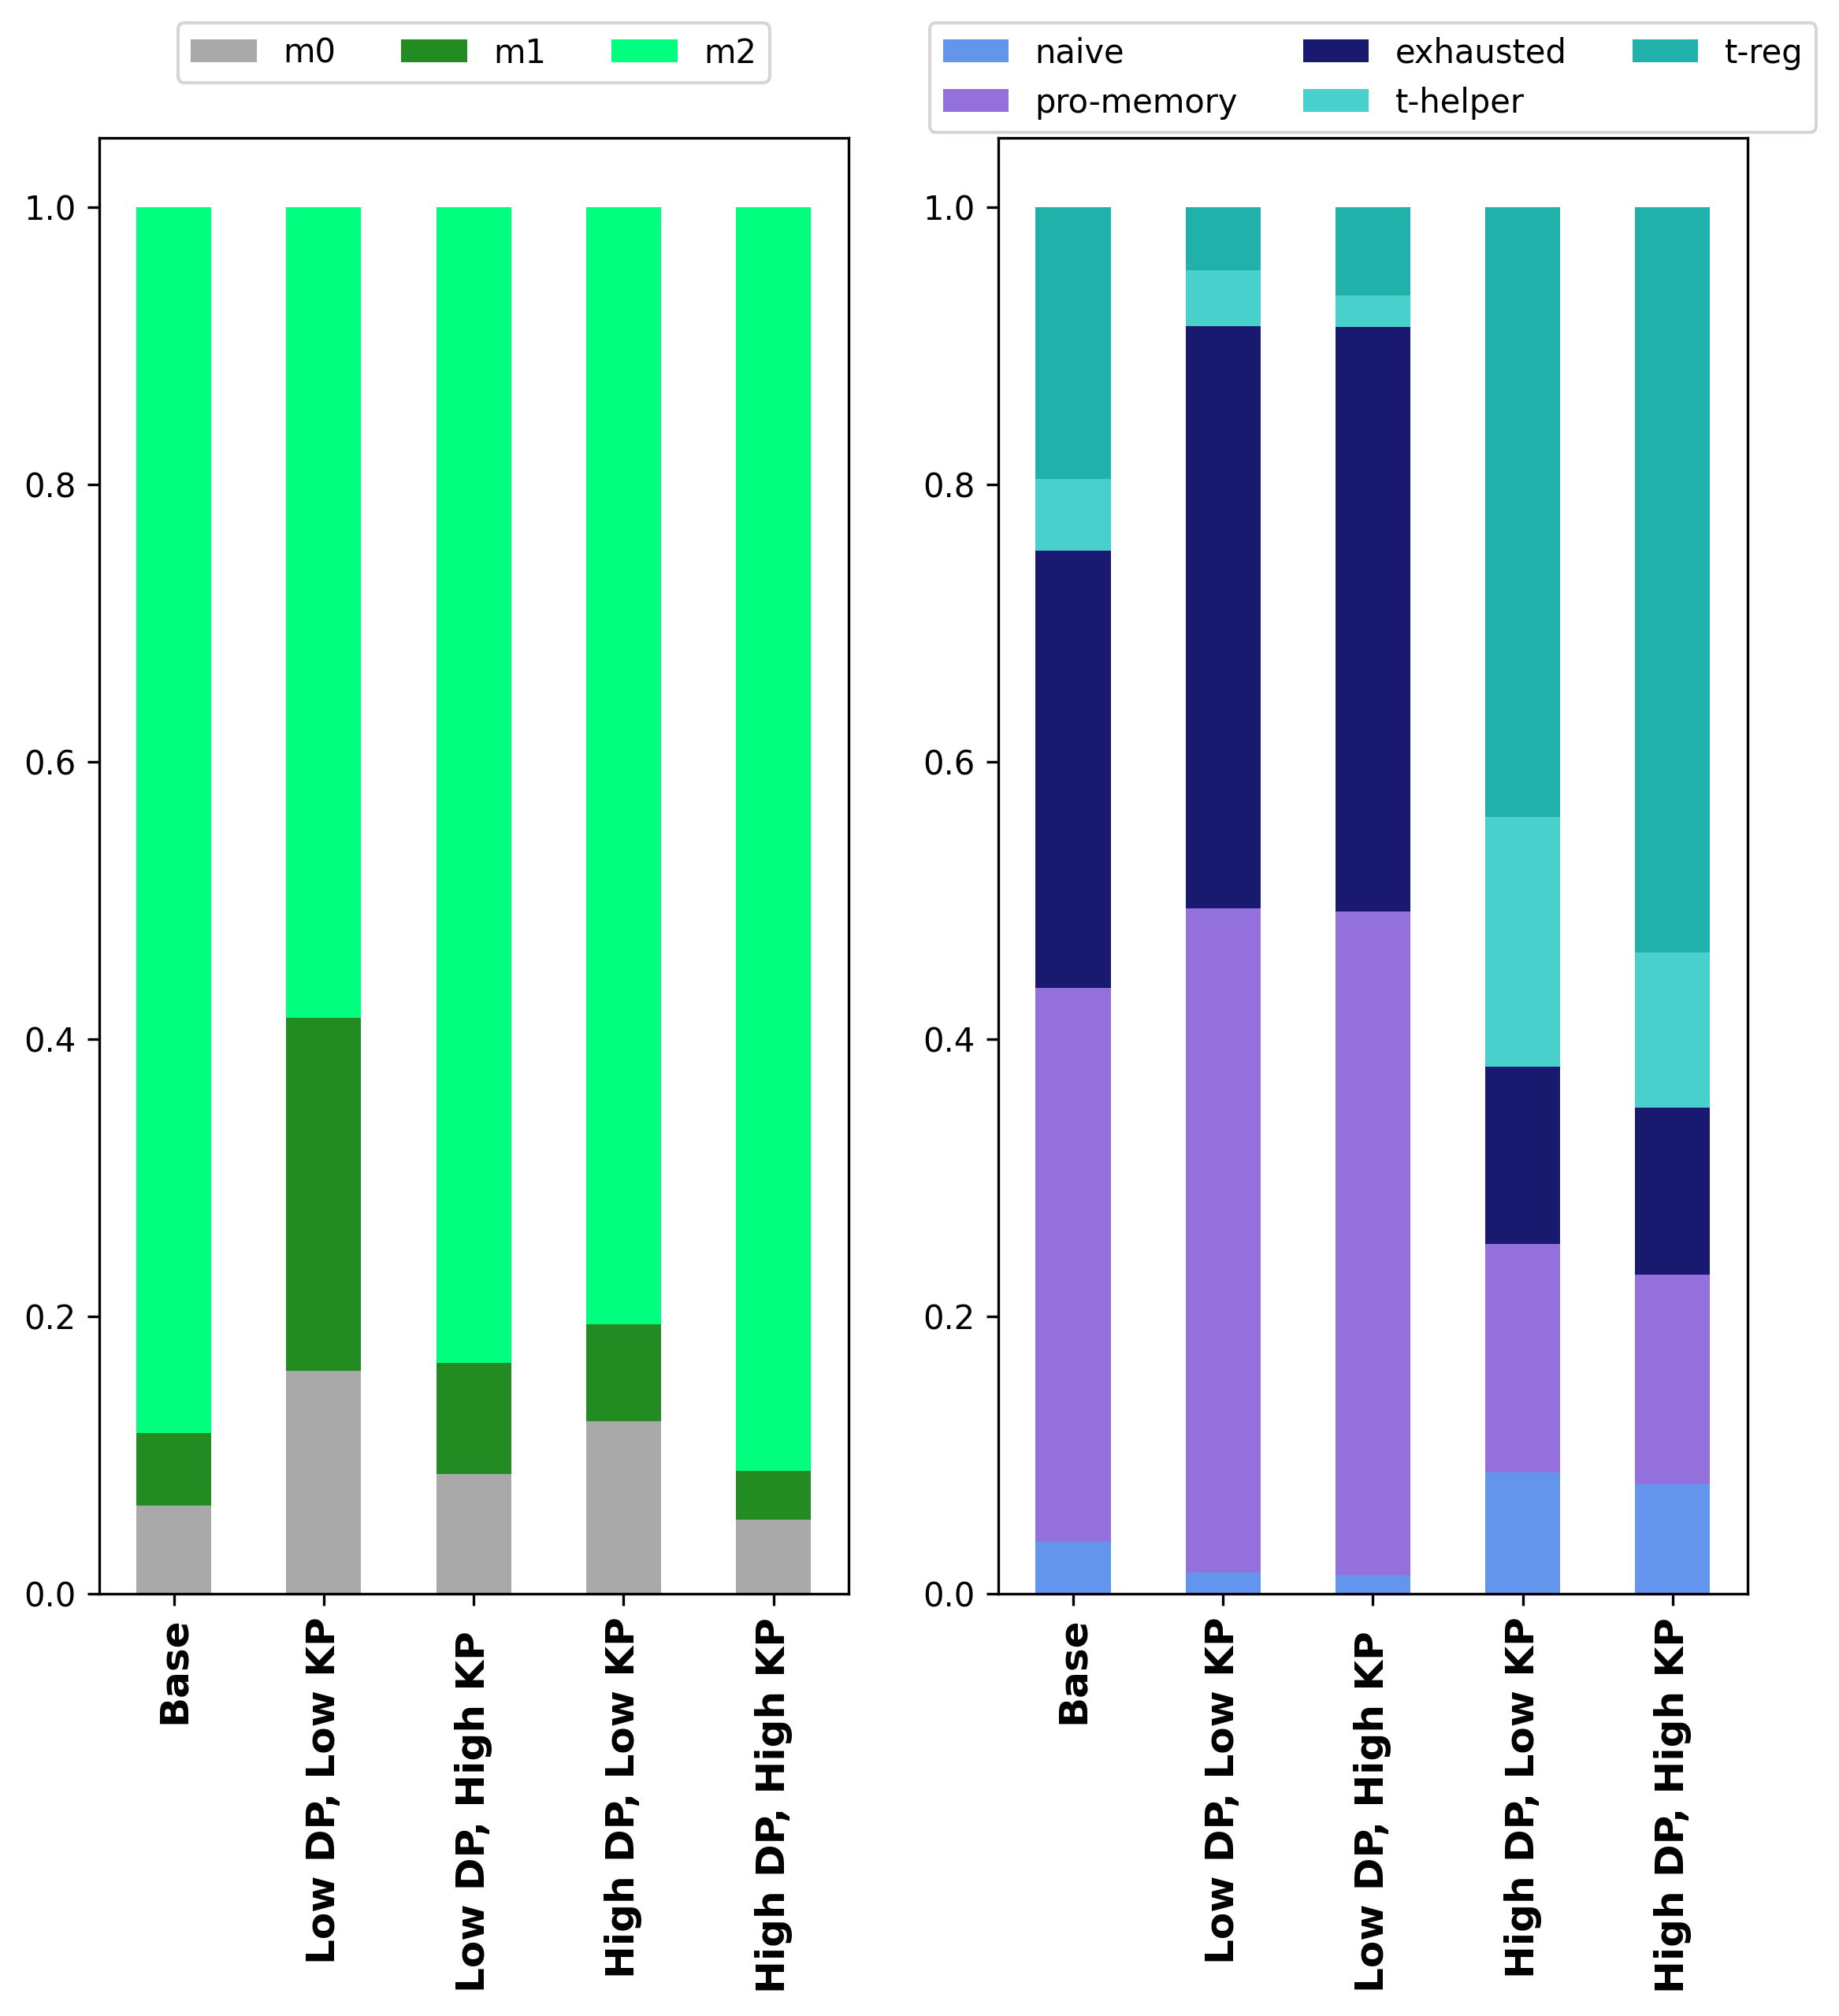

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd


dir_path = sim_pd1block_high
four_corners = [set_dirs[0], set_dirs[1], set_dirs[2], set_dirs[3], set_dirs[4]]

m0 = []
m1 = []
m2 = []
cd4_counts = []
n_cd8 = []
m_cd8 = []
e_cd8 = []
cd8_counts = []
total_tc = []
macrophage_counts = []
th = []
treg = []


std_m0 = []
std_m1 = []
std_m2 = []

std_n_cd8 = []
std_m_cd8 = []
std_e_cd8 = []

std_th = []
std_treg = []


for f in four_corners: 
    rm0 = []
    rm1 = []
    rm2 = []
    rcd4_counts = []
    rn_cd8 = []
    rm_cd8 = []
    re_cd8 = []
    rcd8_counts = []
    rtotal_tc = []
    rmacrophage_counts = []
    rth = []
    rtreg = []

    for sim_code in arr_pd1block_high: 
        df = pd.read_csv(dir_path + sim_code + f + day_dirs[24],header=None)
        df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
        rmacrophage_counts.append((df['cellType'] == 1).sum())
        rm0.append(((df['cellType'] == 1) & (df['state'] == '0')).sum())
        rm1.append(((df['cellType'] == 1) & (df['state'] == '1')).sum())
        rm2.append(((df['cellType'] == 1) & (df['state'] == '2')).sum())
        rn_cd8.append(((df['cellType'] == 3) & (df['state'] == 'N')).sum())
        rm_cd8.append(((df['cellType'] == 3) & (df['state'] == 'M')).sum())
        re_cd8.append(((df['cellType'] == 3) & (df['state'] == 'E')).sum())
        rtotal_tc.append((df['cellType'] == 2).sum() + (df['cellType'] == 3).sum())
        rcd8_counts.append((df['cellType'] == 3).sum())
        rcd4_counts.append((df['cellType'] == 2).sum())
        rth.append(((df['cellType'] == 2) & (df['state'] == '4')).sum())
        rtreg.append(((df['cellType'] == 2) & (df['state'] == '5')).sum())
    
    m0.append(np.mean(rm0))
    m1.append(np.mean(rm1))
    m2.append(np.mean(rm2))
    cd4_counts.append(np.mean(rcd4_counts))
    n_cd8.append(np.mean(rn_cd8))
    m_cd8.append(np.mean(rm_cd8))
    e_cd8.append(np.mean(re_cd8))
    cd8_counts.append(np.mean(rcd8_counts))
    total_tc.append(np.mean(rtotal_tc))
    macrophage_counts.append(np.mean(rmacrophage_counts))
    th.append(np.mean(rth))
    treg.append(np.mean(rtreg))

    std_m0.append(np.std(rm0))
    std_m1.append(np.std(rm1))
    std_m2.append(np.std(rm2))
    
    std_n_cd8.append(np.std(rn_cd8))
    std_m_cd8.append(np.std(rm_cd8))
    std_e_cd8.append(np.std(re_cd8))

    std_th.append(np.std(rth))
    std_treg.append(np.std(rtreg))


    

m0 = np.divide(m0, macrophage_counts)
m1 = np.divide(m1, macrophage_counts)
m2 = np.divide(m2, macrophage_counts)

n_cd8 = np.divide(n_cd8, total_tc)
m_cd8 = np.divide(m_cd8, total_tc)
e_cd8 = np.divide(e_cd8, total_tc)

th = np.divide(th, total_tc) 
treg = np.divide(treg, total_tc)


std_m0 = np.divide(std_m0, macrophage_counts)
std_m1 = np.divide(std_m1, macrophage_counts)
std_m2 = np.divide(std_m2, macrophage_counts)

std_n_cd8 = np.divide(std_n_cd8, total_tc)
std_m_cd8 = np.divide(std_m_cd8, total_tc)
std_e_cd8 = np.divide(std_e_cd8, total_tc)

std_th = np.divide(std_th, total_tc) 
std_treg = np.divide(std_treg, total_tc)

d = pd.DataFrame({
        'm0': m0, 
        'm1': m1, 
        'm2': m2
    }, index=['Base', 'Low DP, Low KP', 'Low DP, High KP ', 'High DP, Low KP', 'High DP, High KP']
    )

s_d = pd.DataFrame({
        'm0': std_m0, 
        'm1': std_m1, 
        'm2': std_m2
    }, index=['Base', 'Low DP, Low KP', 'Low DP, High KP ', 'High DP, Low KP', 'High DP, High KP']
    )

r = pd.DataFrame({
        'naive': n_cd8, 
        'pro-memory': m_cd8, 
        'exhausted': e_cd8, 
        't-helper': th, 
        't-reg': treg
    }, index=['Base', 'Low DP, Low KP', 'Low DP, High KP ', 'High DP, Low KP', 'High DP, High KP']
    )

s_r = pd.DataFrame({
        'naive': std_n_cd8, 
        'pro-memory': std_m_cd8, 
        'exhausted': std_e_cd8, 
        't-helper': std_th, 
        't-reg': std_treg
    }, index=['Base', 'Low DP, Low KP', 'Low DP, High KP ', 'High DP, Low KP', 'High DP, High KP']
    )


out = pd.DataFrame({
    'base': [m0[0], m1[0], m2[0], n_cd8[0], m_cd8[0], e_cd8[0], th[0], treg[0]], 
    'std_base': [std_m0[0], std_m1[0], std_m2[0], std_n_cd8[0], std_m_cd8[0], std_e_cd8[0], std_th[0], std_treg[0]],
    'lowdp_lowkp': [m0[1], m1[1], m2[1], n_cd8[1], m_cd8[1], e_cd8[1], th[1], treg[1]], 
    'std_ldplkp': [std_m0[1], std_m1[1], std_m2[1], std_n_cd8[1], std_m_cd8[1], std_e_cd8[1], std_th[1], std_treg[1]], 
    'lowdp_highkp': [m0[2], m1[2], m2[2], n_cd8[2], m_cd8[2], e_cd8[2], th[2], treg[2]], 
    'std_ldphkp': [std_m0[2], std_m1[2], std_m2[2], std_n_cd8[2], std_m_cd8[2], std_e_cd8[2], std_th[2], std_treg[2]],
    'highdp_lowkp': [m0[3], m1[3], m2[3], n_cd8[3], m_cd8[3], e_cd8[3], th[3], treg[3]], 
    'std_hdplkp': [std_m0[3], std_m1[3], std_m2[3], std_n_cd8[3], std_m_cd8[3], std_e_cd8[3], std_th[3], std_treg[3]],
    'highdp_highkp': [m0[4], m1[4], m2[4], n_cd8[4], m_cd8[4], e_cd8[4], th[4], treg[4]], 
    'std_hdphkp': [std_m0[4], std_m1[4], std_m2[4], std_n_cd8[4], std_m_cd8[4], std_e_cd8[4], std_th[4], std_treg[4]],
 })



mac_c_palette = ['darkgrey', 'forestgreen', 'springgreen']
tc_c_palette = ['cornflowerblue', 'mediumpurple', 'midnightblue', 'mediumturquoise', 'lightseagreen']

fig, axes = plt.subplots(1,2, figsize=(9, 8))

p = d.plot(kind='bar', stacked=True, color=mac_c_palette, ax=axes[0])
p.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09), fancybox=True, ncol=3)
p.set_xticklabels(d.index, fontsize=12, rotation=90, fontweight='bold')


q = r.plot(kind='bar', stacked=True, ax=axes[1], color=tc_c_palette)
q.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09), fancybox=True, ncol=3)
q.set_xticklabels(r.index, fontsize=12, rotation=90, fontweight='bold')

sim_flavor = 'pd1block_high'

# out.to_csv(f'{sim_flavor}_profile.csv')
d.to_csv(f'{sim_flavor}_macprofile.csv')
s_d.to_csv(f'{sim_flavor}_std_macprofile.csv')
r.to_csv(f'{sim_flavor}_tcprofile.csv')
s_r.to_csv(f'{sim_flavor}_std_tcprofile.csv')


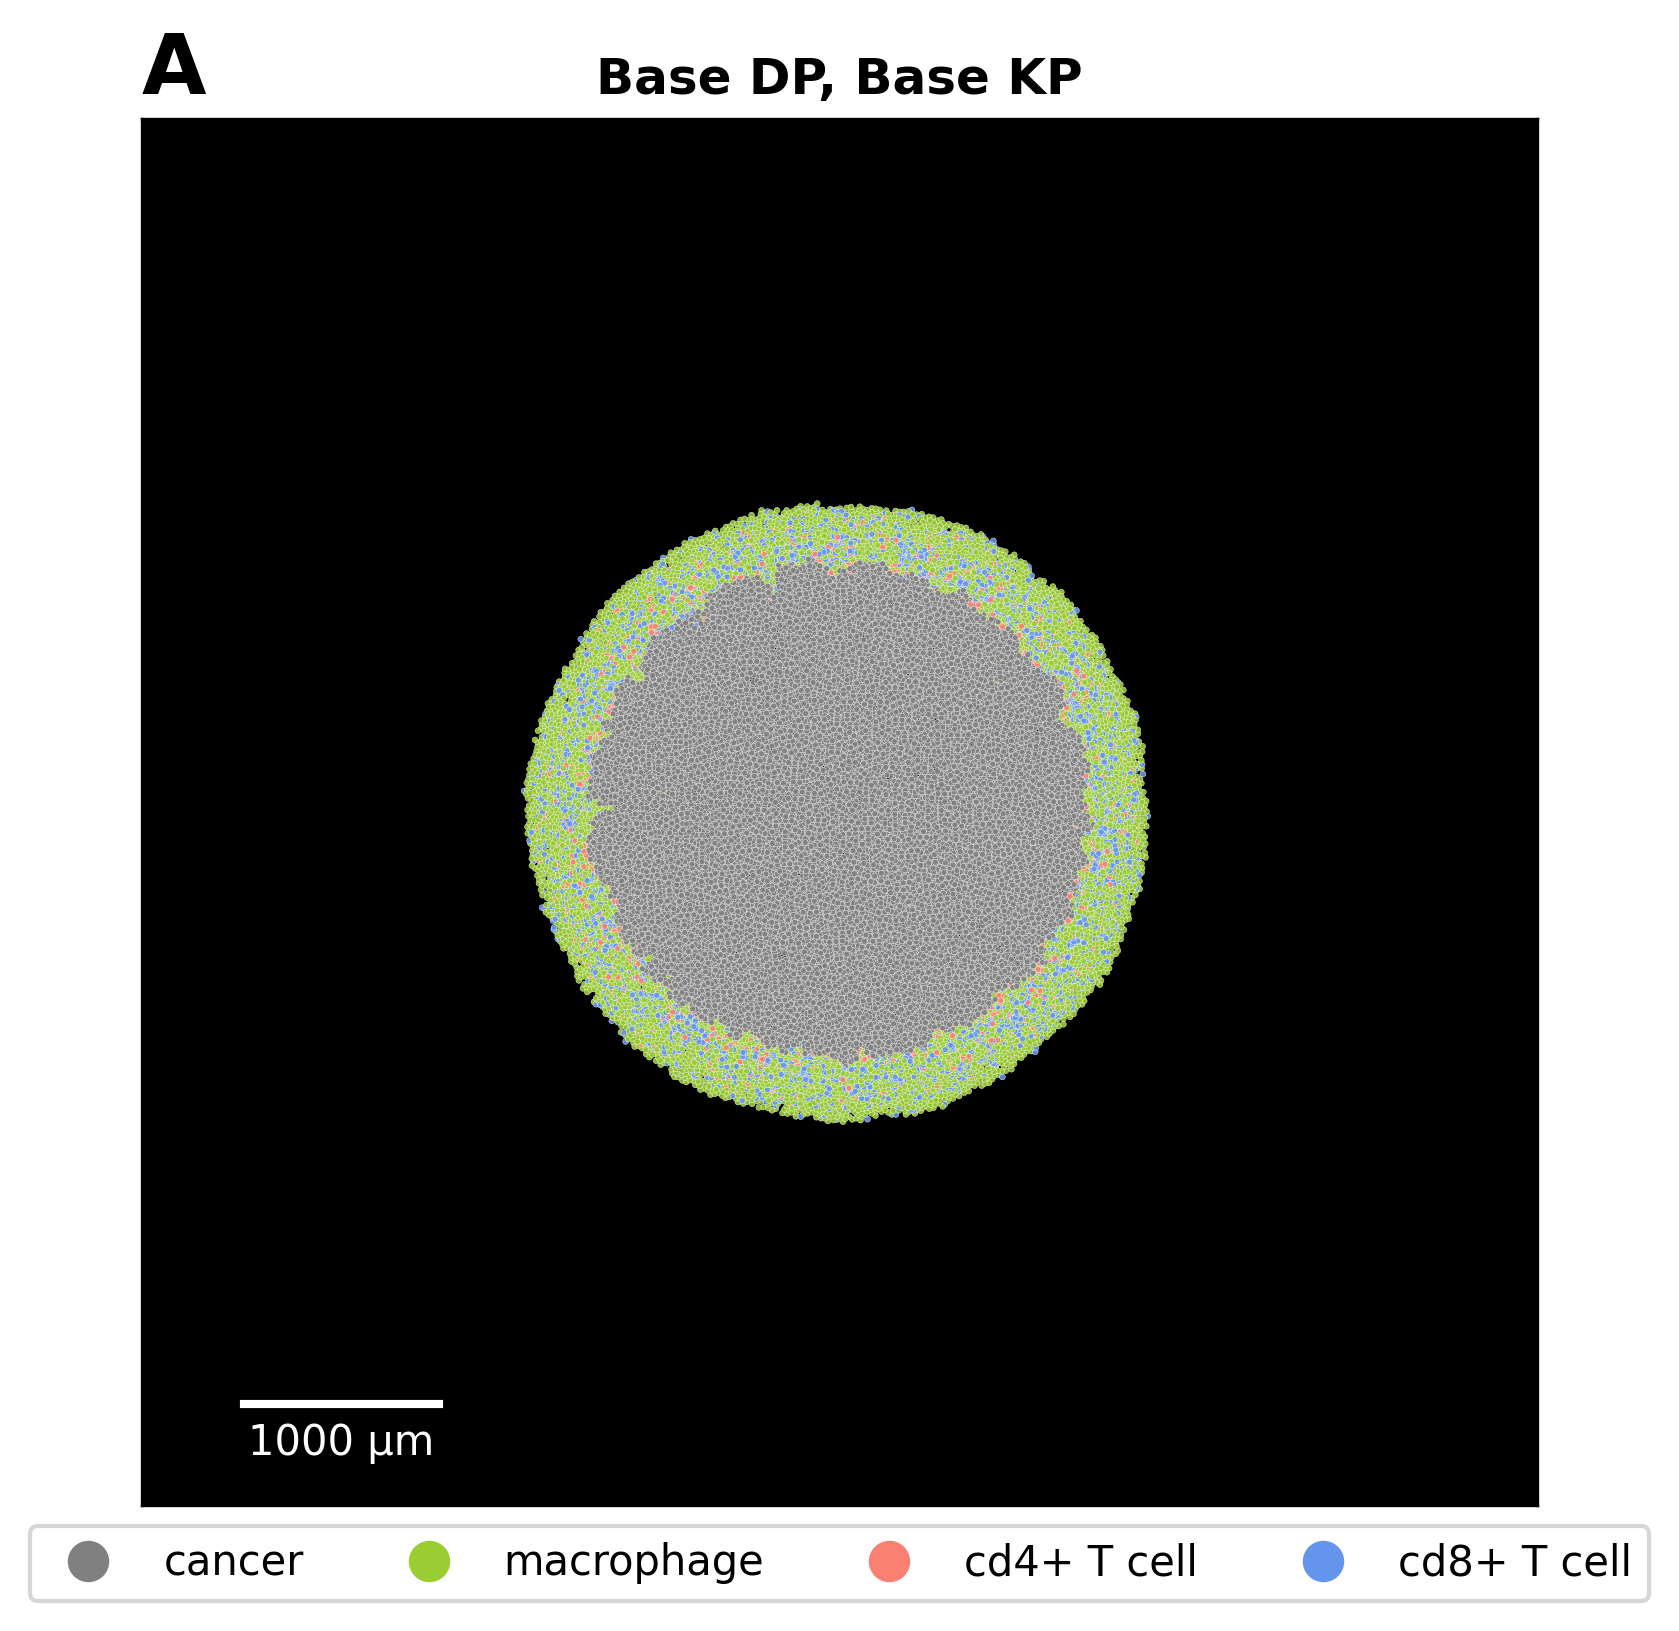

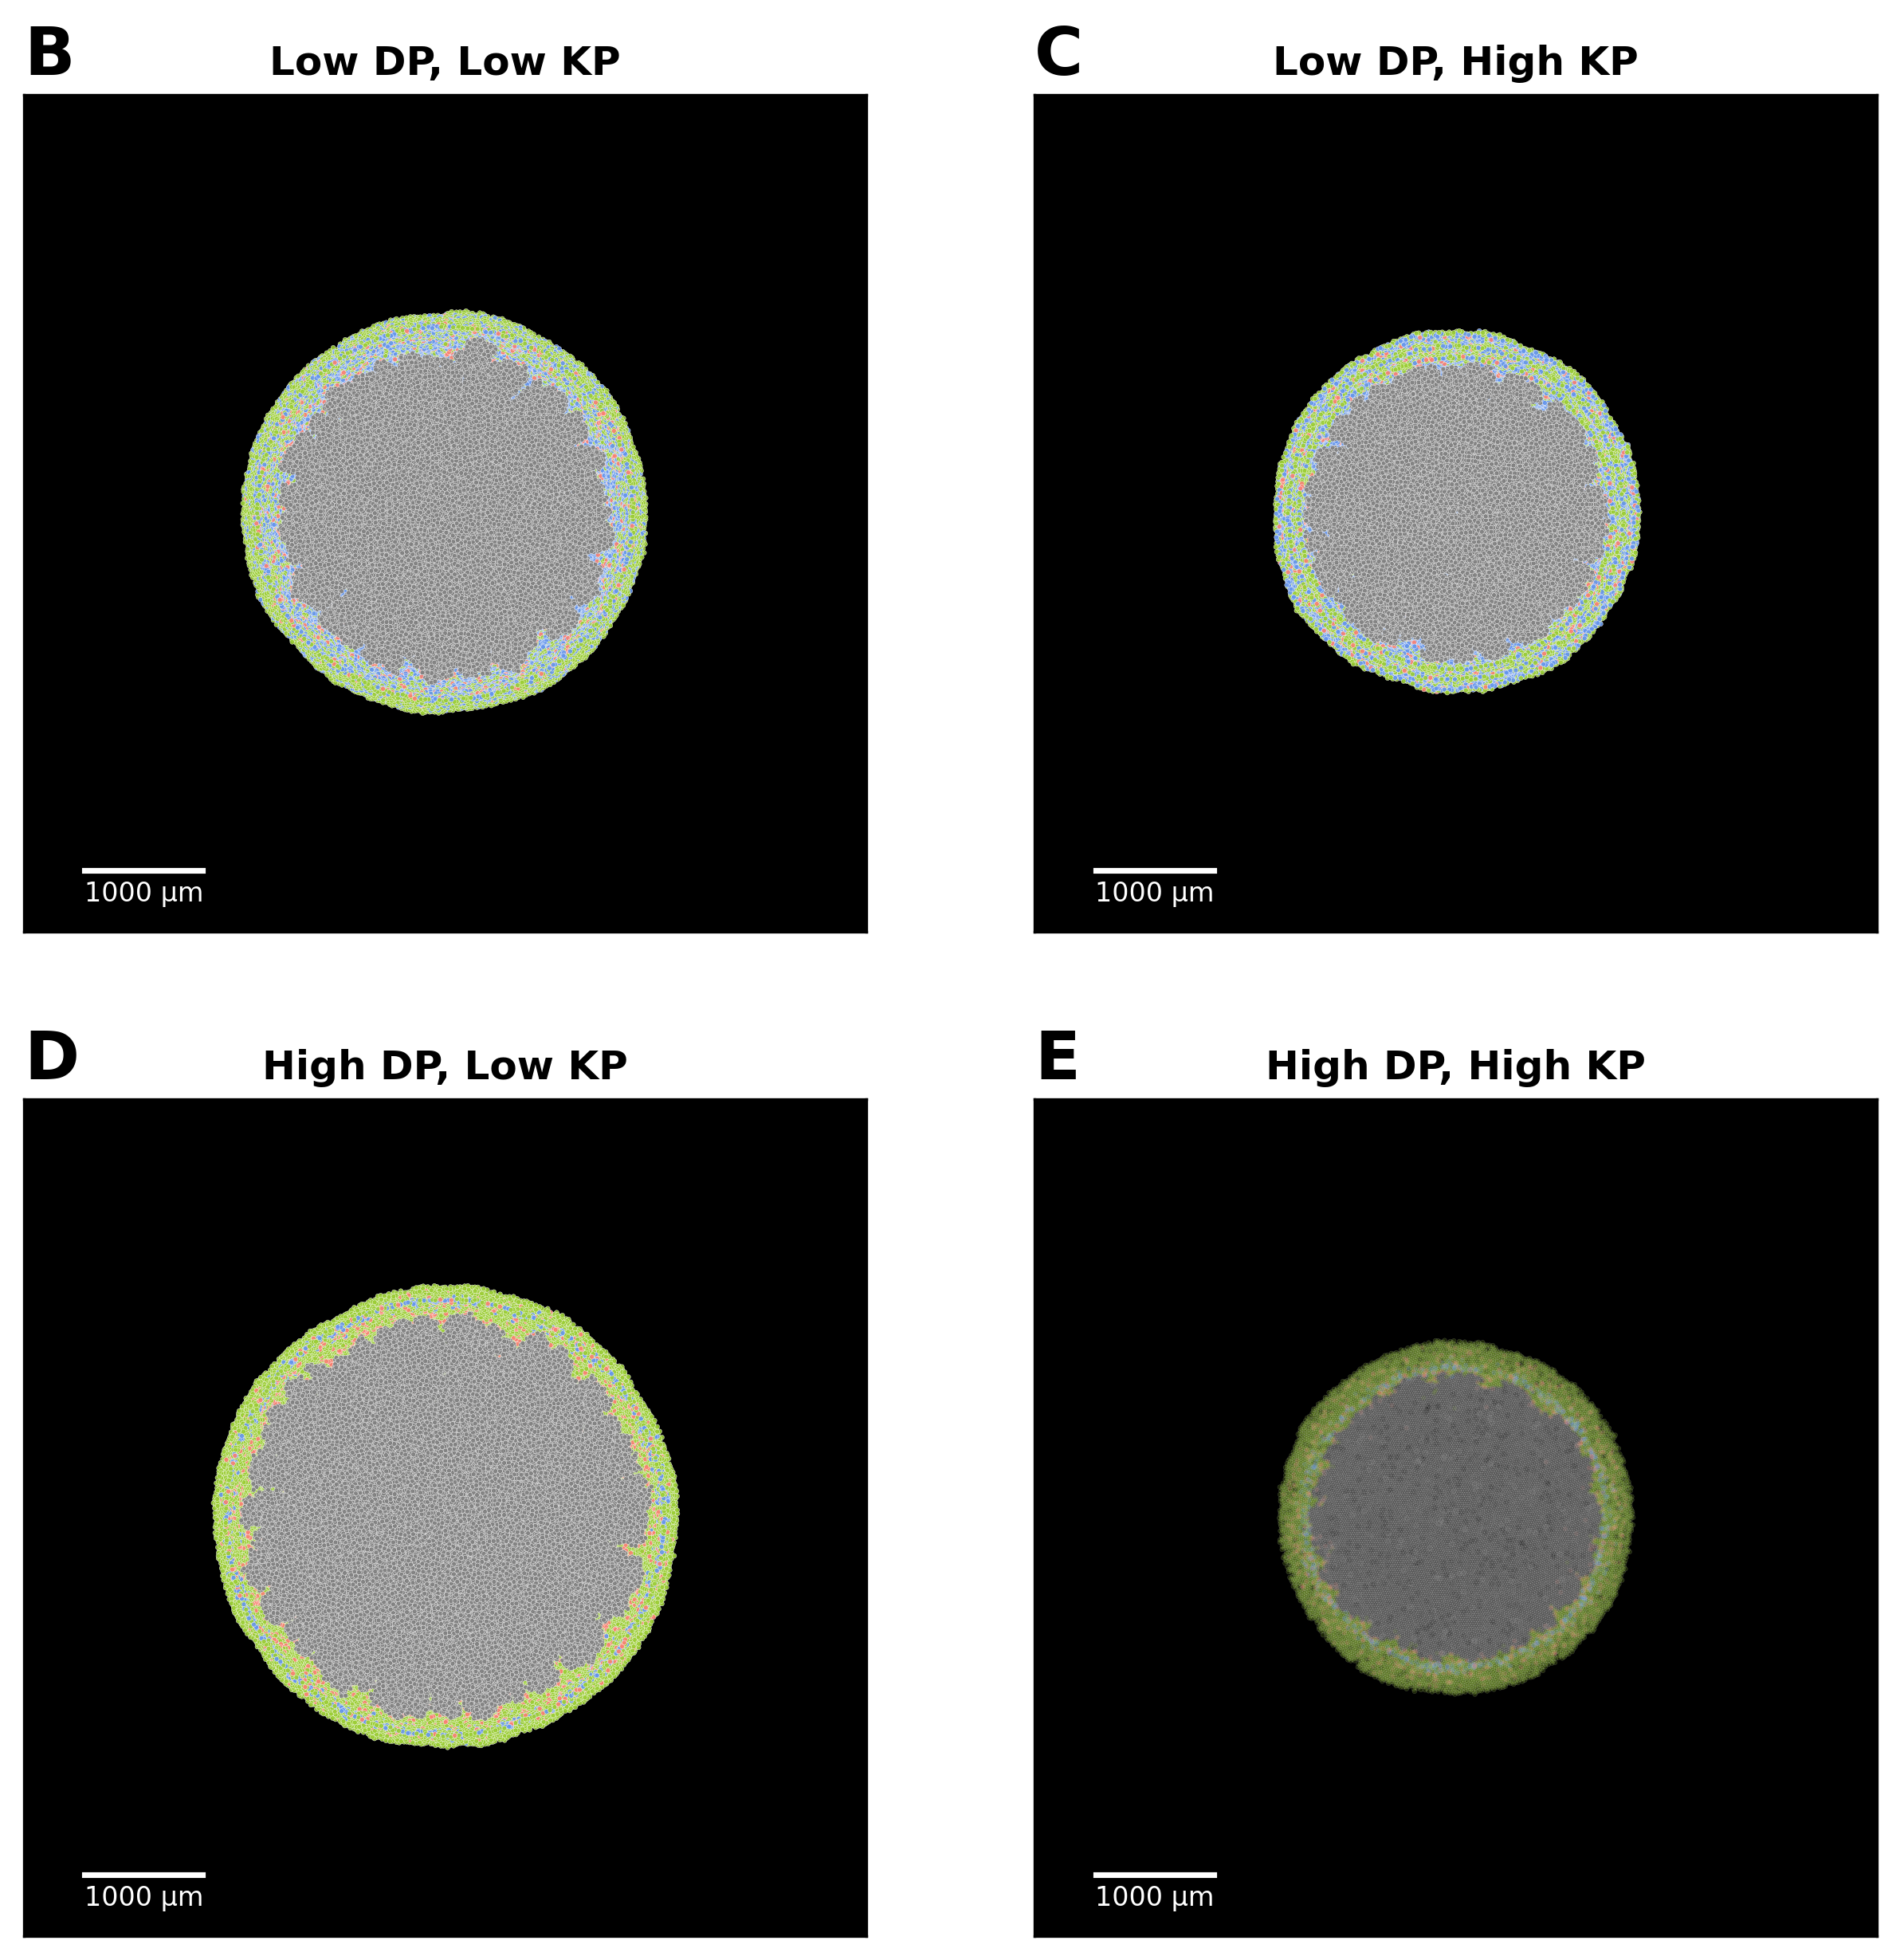

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import pandas as pd 
import numpy as np

import random

END_DAY = 'day_24/cells.csv'
dir_path = sim_pd1block_high + arr_pd1block_high[random.randint(0, 9)]


cell_palette = {
    0: 'gray',
    1: 'yellowgreen',
    2: 'salmon',
    3: 'cornflowerblue'
}

scale_length = 1000  # Length of the scale bar in micrometers
scale_loc = (-3000, -3000)  # Location of the scale bar (bottom-left corner)
scale_width = 100  # Width of the scale bar
scale_height = 20  # Height of the scale bar
scale_label_offset = 50  # Offset for the scale label

fig = plt.figure(figsize=(6, 6))
df = pd.read_csv(dir_path + set_dirs[0]+END_DAY, header=None)
df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
p = sns.scatterplot(data=df, x='x_loc', y='y_loc', hue='cellType', palette=cell_palette, alpha=0.9, s=2)
label_mod = [
    'cancer',
    'macrophage', 
    'cd4+ T cell', 
    'cd8+ T cell', 
]
legend_labels = {i: label_mod[i] for i in range(len(label_mod))}
handles, _ = p.get_legend_handles_labels()

# Add title and labels
xlim = p.get_xlim()
ylim = p.get_ylim()
min_limit = min(xlim[0], ylim[0])
max_limit = max(xlim[1], ylim[1])
p.set_xlim(-3500, 3500)
p.set_ylim(-3500, 3500)
p.set(xticklabels=[])
p.set(yticklabels=[])
p.set_facecolor('black')
plt.legend().remove()
plt.xlabel('')
plt.ylabel('')
plt.title('Base DP, Base KP', fontweight='bold')
plt.title('A', fontsize=20, fontweight='bold', loc='left')
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

plt.gca().add_patch(patches.Rectangle(scale_loc, scale_length, scale_height, color='white'))
plt.text(scale_loc[0] + scale_length / 2, scale_loc[1] - scale_label_offset-200, f'{scale_length} μm', color='white', ha='center', fontsize=10)

h1 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='gray', linestyle='None')
h2 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='yellowgreen', linestyle='None')
h3 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='salmon', linestyle='None')
h4 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='cornflowerblue', linestyle='None')

plt.legend([h1, h2, h3, h4], ['cancer', 'macrophage', 'cd4+ T cell', 'cd8+ T cell'], loc="upper center",
           bbox_to_anchor=(0.5, -0.0), 
           ncol=len(label_mod),
           markerscale=2,
           scatterpoints=1, fontsize=10)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2, 2, 1)
df = pd.read_csv(dir_path + set_dirs[1]+END_DAY, header=None)
df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
p = sns.scatterplot(data=df, x='x_loc', y='y_loc', hue='cellType', palette=cell_palette, alpha=0.9, s=2)
label_mod = [
    'cancer',
    'macrophage', 
    'cd4+ T cell', 
    'cd8+ T cell', 
]
legend_labels = {i: label_mod[i] for i in range(len(label_mod))}
handles, _ = p.get_legend_handles_labels()

# Add title and labels
xlim = p.get_xlim()
ylim = p.get_ylim()
min_limit = min(xlim[0], ylim[0])
max_limit = max(xlim[1], ylim[1])
p.set_xlim(-3500, 3500)
p.set_ylim(-3500, 3500)
p.set(xticklabels=[])
p.set(yticklabels=[])
p.set_facecolor('black')
plt.legend().remove()
plt.title('Low DP, Low KP', fontweight='bold')
plt.title('B', fontsize=20, fontweight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.gca().add_patch(patches.Rectangle(scale_loc, scale_length, scale_height, color='white'))
plt.text(scale_loc[0] + scale_length / 2, scale_loc[1] - scale_label_offset-200, f'{scale_length} μm', color='white', ha='center', fontsize=8)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)


plt.subplot(2, 2, 2)
df = pd.read_csv(dir_path + set_dirs[2]+END_DAY, header=None)
df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
p = sns.scatterplot(data=df, x='x_loc', y='y_loc', hue='cellType', palette=cell_palette, alpha=0.9, s=2)
label_mod = [
    'cancer',
    'macrophage', 
    'cd4+ T cell', 
    'cd8+ T cell', 
]
legend_labels = {i: label_mod[i] for i in range(len(label_mod))}
handles, _ = p.get_legend_handles_labels()

# Add title and labels
xlim = p.get_xlim()
ylim = p.get_ylim()
min_limit = min(xlim[0], ylim[0])
max_limit = max(xlim[1], ylim[1])
p.set_xlim(-3500, 3500)
p.set_ylim(-3500, 3500)
p.set(xticklabels=[])
p.set(yticklabels=[])
p.set_facecolor('black')
plt.legend().remove()
plt.title('Low DP, High KP', fontweight='bold')
plt.title('C', fontsize=20, fontweight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.gca().add_patch(patches.Rectangle(scale_loc, scale_length, scale_height, color='white'))
plt.text(scale_loc[0] + scale_length / 2, scale_loc[1] - scale_label_offset-200, f'{scale_length} μm', color='white', ha='center', fontsize=8)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)


plt.subplot(2, 2, 3)
df = pd.read_csv(dir_path + set_dirs[3]+END_DAY, header=None)
df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
p = sns.scatterplot(data=df, x='x_loc', y='y_loc', hue='cellType', palette=cell_palette, alpha=0.9, s=2)
label_mod = [
    'cancer',
    'macrophage', 
    'cd4+ T cell', 
    'cd8+ T cell', 
]
legend_labels = {i: label_mod[i] for i in range(len(label_mod))}
handles, _ = p.get_legend_handles_labels()

# Add title and labels
xlim = p.get_xlim()
ylim = p.get_ylim()
min_limit = min(xlim[0], ylim[0])
max_limit = max(xlim[1], ylim[1])
p.set_xlim(-3500, 3500)
p.set_ylim(-3500, 3500)
p.set(xticklabels=[])
p.set(yticklabels=[])
p.set_facecolor('black')
plt.legend().remove()
plt.title('High DP, Low KP', fontweight='bold')
plt.title('D', fontsize=20, fontweight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.gca().add_patch(patches.Rectangle(scale_loc, scale_length, scale_height, color='white'))
plt.text(scale_loc[0] + scale_length / 2, scale_loc[1] - scale_label_offset-200, f'{scale_length} μm', color='white', ha='center', fontsize=8)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

plt.subplot(2, 2, 4)
df = pd.read_csv(dir_path + set_dirs[4]+END_DAY, header=None)
df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
p = sns.scatterplot(data=df, x='x_loc', y='y_loc', hue='cellType', palette=cell_palette, alpha=0.2, s=2)
label_mod = [
    'cancer',
    'macrophage', 
    'cd4+ T cell', 
    'cd8+ T cell', 
]
legend_labels = {i: label_mod[i] for i in range(len(label_mod))}
handles, _ = p.get_legend_handles_labels()

# Add title and labels
xlim = p.get_xlim()
ylim = p.get_ylim()
min_limit = min(xlim[0], ylim[0])
max_limit = max(xlim[1], ylim[1])
p.set_xlim(-3500, 3500)
p.set_ylim(-3500, 3500)
p.set(xticklabels=[])
p.set(yticklabels=[])
p.set_facecolor('black')
plt.legend().remove()
plt.title('High DP, High KP', fontweight='bold')
plt.title('E', fontsize=20, fontweight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.gca().add_patch(patches.Rectangle(scale_loc, scale_length, scale_height, color='white'))
plt.text(scale_loc[0] + scale_length / 2, scale_loc[1] - scale_label_offset-200, f'{scale_length} μm', color='white', ha='center', fontsize=8)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import numpy as np 
import pandas as pd
import random

# /*
#  * CELL TYPES
#  * 0 - cancer
#  * 1 - macrophage
#  * 2 - CD4
#  * 3 - CD8
#  *
#  * CELL STATES
#  * -1 - dead
#  * 0 - M0
#  * 1 - M1
#  * 2 - M2
#  * 3 - alive (cancer)
#  * 4 - Th
#  * 5 - Treg
#  * 6 - active (CD8)
#  * 7 - suppressed (CD8)
#  *
#  */

END_DAY = 'day_24/cells.csv'

AVG_INFILTRATION_CD8_WT_BASE = 0
AVG_INFILTRATION_CD8_WT_HIGH = 0

AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TH_WT_BASE = 0
AVG_INFILTRATION_TH_WT_HIGH = 0

AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TREG_WT_BASE = 0
AVG_INFILTRATION_TREG_WT_HIGH = 0

AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0



STD_INFILTRATION_CD8_WT_BASE = 0
STD_INFILTRATION_CD8_WT_HIGH = 0

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TH_WT_BASE = 0
STD_INFILTRATION_TH_WT_HIGH = 0

STD_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TREG_WT_BASE = 0
STD_INFILTRATION_TREG_WT_HIGH = 0

STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_M0_WT_BASE = 0
AVG_INFILTRATION_M1_WT_BASE = 0
AVG_INFILTRATION_M2_WT_BASE = 0

AVG_INFILTRATION_M0_WT_HIGH = 0
AVG_INFILTRATION_M1_WT_HIGH = 0
AVG_INFILTRATION_M2_WT_HIGH = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0


STD_INFILTRATION_M0_WT_BASE = 0
STD_INFILTRATION_M1_WT_BASE = 0
STD_INFILTRATION_M2_WT_BASE = 0

STD_INFILTRATION_M0_WT_HIGH = 0
STD_INFILTRATION_M1_WT_HIGH = 0
STD_INFILTRATION_M2_WT_HIGH = 0

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0





avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_base: 


    dir_path = sim_wt_base + sim_id + set_dirs[0]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_WT_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_BASE = np.std(avg_dist_m2)



avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_high: 
    
    

    dir_path = sim_wt_high + sim_id + set_dirs[0]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_WT_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_HIGH = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_HIGH = np.std(avg_dist_m2)




avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_base: 
    

    dir_path = sim_pd1block_base + sim_id + set_dirs[0]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = np.std(avg_dist_m2)

avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_high: 
    
    dir_path = sim_pd1block_high + sim_id + set_dirs[0]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.mean(avg_dist_treg) 


STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.std(avg_dist_m2)

#--------------------------------------------- SAVE TO FILE ----------------------------------------------------------

save_txt_avgs = np.array([[AVG_INFILTRATION_CD8_WT_BASE, AVG_INFILTRATION_TH_WT_BASE, AVG_INFILTRATION_TREG_WT_BASE],
                    [AVG_INFILTRATION_CD8_WT_HIGH, AVG_INFILTRATION_TH_WT_HIGH, AVG_INFILTRATION_TREG_WT_HIGH], 
                     [AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE, AVG_INFILTRATION_TH_PD1BLOCKADE_BASE, AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

save_txt_stds = np.array([[STD_INFILTRATION_CD8_WT_BASE, STD_INFILTRATION_TH_WT_BASE, STD_INFILTRATION_TREG_WT_BASE],
                    [STD_INFILTRATION_CD8_WT_HIGH, STD_INFILTRATION_TH_WT_HIGH, STD_INFILTRATION_TREG_WT_HIGH], 
                     [STD_INFILTRATION_CD8_PD1BLOCKADE_BASE, STD_INFILTRATION_TH_PD1BLOCKADE_BASE, STD_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH, STD_INFILTRATION_TH_PD1BLOCKADE_HIGH, STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

mac_txt_avgs = np.array([[AVG_INFILTRATION_M0_WT_BASE, AVG_INFILTRATION_M1_WT_BASE, AVG_INFILTRATION_M2_WT_BASE],
                        [AVG_INFILTRATION_M0_WT_HIGH, AVG_INFILTRATION_M1_WT_HIGH, AVG_INFILTRATION_M2_WT_HIGH],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_BASE, AVG_INFILTRATION_M1_PD1BLOCKADE_BASE, AVG_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH]])

mac_txt_std = np.array([[STD_INFILTRATION_M0_WT_BASE, STD_INFILTRATION_M1_WT_BASE, STD_INFILTRATION_M2_WT_BASE],
                        [STD_INFILTRATION_M0_WT_HIGH, STD_INFILTRATION_M1_WT_HIGH, STD_INFILTRATION_M2_WT_HIGH],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_BASE, STD_INFILTRATION_M1_PD1BLOCKADE_BASE, STD_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_HIGH, STD_INFILTRATION_M1_PD1BLOCKADE_HIGH, STD_INFILTRATION_M2_PD1BLOCKADE_HIGH]])


np.savetxt('set_0_avg_infiltration.csv', save_txt_avgs, delimiter=',')
np.savetxt('set_0_std_infiltration.csv', save_txt_stds, delimiter=',')

np.savetxt('set_0_avg_mac_infiltration.csv', mac_txt_avgs, delimiter=',')
np.savetxt('set_0_std_mac_infiltration.csv', mac_txt_std, delimiter=',')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import numpy as np 
import pandas as pd
import random

# /*
#  * CELL TYPES
#  * 0 - cancer
#  * 1 - macrophage
#  * 2 - CD4
#  * 3 - CD8
#  *
#  * CELL STATES
#  * -1 - dead
#  * 0 - M0
#  * 1 - M1
#  * 2 - M2
#  * 3 - alive (cancer)
#  * 4 - Th
#  * 5 - Treg
#  * 6 - active (CD8)
#  * 7 - suppressed (CD8)
#  *
#  */

END_DAY = 'day_24/cells.csv'

AVG_INFILTRATION_CD8_WT_BASE = 0
AVG_INFILTRATION_CD8_WT_HIGH = 0

AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TH_WT_BASE = 0
AVG_INFILTRATION_TH_WT_HIGH = 0

AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TREG_WT_BASE = 0
AVG_INFILTRATION_TREG_WT_HIGH = 0

AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0



STD_INFILTRATION_CD8_WT_BASE = 0
STD_INFILTRATION_CD8_WT_HIGH = 0

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TH_WT_BASE = 0
STD_INFILTRATION_TH_WT_HIGH = 0

STD_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TREG_WT_BASE = 0
STD_INFILTRATION_TREG_WT_HIGH = 0

STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_M0_WT_BASE = 0
AVG_INFILTRATION_M1_WT_BASE = 0
AVG_INFILTRATION_M2_WT_BASE = 0

AVG_INFILTRATION_M0_WT_HIGH = 0
AVG_INFILTRATION_M1_WT_HIGH = 0
AVG_INFILTRATION_M2_WT_HIGH = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0


STD_INFILTRATION_M0_WT_BASE = 0
STD_INFILTRATION_M1_WT_BASE = 0
STD_INFILTRATION_M2_WT_BASE = 0

STD_INFILTRATION_M0_WT_HIGH = 0
STD_INFILTRATION_M1_WT_HIGH = 0
STD_INFILTRATION_M2_WT_HIGH = 0

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0





avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_base: 


    dir_path = sim_wt_base + sim_id + set_dirs[1]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_WT_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_BASE = np.std(avg_dist_m2)



avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_high: 
    
    

    dir_path = sim_wt_high + sim_id + set_dirs[1]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_WT_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_HIGH = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_HIGH = np.std(avg_dist_m2)




avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_base: 
    

    dir_path = sim_pd1block_base + sim_id + set_dirs[1]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = np.std(avg_dist_m2)

avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_high: 
    
    dir_path = sim_pd1block_high + sim_id + set_dirs[1]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.mean(avg_dist_treg) 


STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.std(avg_dist_m2)

#--------------------------------------------- SAVE TO FILE ----------------------------------------------------------

save_txt_avgs = np.array([[AVG_INFILTRATION_CD8_WT_BASE, AVG_INFILTRATION_TH_WT_BASE, AVG_INFILTRATION_TREG_WT_BASE],
                    [AVG_INFILTRATION_CD8_WT_HIGH, AVG_INFILTRATION_TH_WT_HIGH, AVG_INFILTRATION_TREG_WT_HIGH], 
                     [AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE, AVG_INFILTRATION_TH_PD1BLOCKADE_BASE, AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

save_txt_stds = np.array([[STD_INFILTRATION_CD8_WT_BASE, STD_INFILTRATION_TH_WT_BASE, STD_INFILTRATION_TREG_WT_BASE],
                    [STD_INFILTRATION_CD8_WT_HIGH, STD_INFILTRATION_TH_WT_HIGH, STD_INFILTRATION_TREG_WT_HIGH], 
                     [STD_INFILTRATION_CD8_PD1BLOCKADE_BASE, STD_INFILTRATION_TH_PD1BLOCKADE_BASE, STD_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH, STD_INFILTRATION_TH_PD1BLOCKADE_HIGH, STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

mac_txt_avgs = np.array([[AVG_INFILTRATION_M0_WT_BASE, AVG_INFILTRATION_M1_WT_BASE, AVG_INFILTRATION_M2_WT_BASE],
                        [AVG_INFILTRATION_M0_WT_HIGH, AVG_INFILTRATION_M1_WT_HIGH, AVG_INFILTRATION_M2_WT_HIGH],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_BASE, AVG_INFILTRATION_M1_PD1BLOCKADE_BASE, AVG_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH]])

mac_txt_std = np.array([[STD_INFILTRATION_M0_WT_BASE, STD_INFILTRATION_M1_WT_BASE, STD_INFILTRATION_M2_WT_BASE],
                        [STD_INFILTRATION_M0_WT_HIGH, STD_INFILTRATION_M1_WT_HIGH, STD_INFILTRATION_M2_WT_HIGH],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_BASE, STD_INFILTRATION_M1_PD1BLOCKADE_BASE, STD_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_HIGH, STD_INFILTRATION_M1_PD1BLOCKADE_HIGH, STD_INFILTRATION_M2_PD1BLOCKADE_HIGH]])


np.savetxt('set_1_avg_infiltration.csv', save_txt_avgs, delimiter=',')
np.savetxt('set_1_std_infiltration.csv', save_txt_stds, delimiter=',')

np.savetxt('set_1_avg_mac_infiltration.csv', mac_txt_avgs, delimiter=',')
np.savetxt('set_1_std_mac_infiltration.csv', mac_txt_std, delimiter=',')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import numpy as np 
import pandas as pd
import random

# /*
#  * CELL TYPES
#  * 0 - cancer
#  * 1 - macrophage
#  * 2 - CD4
#  * 3 - CD8
#  *
#  * CELL STATES
#  * -1 - dead
#  * 0 - M0
#  * 1 - M1
#  * 2 - M2
#  * 3 - alive (cancer)
#  * 4 - Th
#  * 5 - Treg
#  * 6 - active (CD8)
#  * 7 - suppressed (CD8)
#  *
#  */

END_DAY = 'day_24/cells.csv'

AVG_INFILTRATION_CD8_WT_BASE = 0
AVG_INFILTRATION_CD8_WT_HIGH = 0

AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TH_WT_BASE = 0
AVG_INFILTRATION_TH_WT_HIGH = 0

AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TREG_WT_BASE = 0
AVG_INFILTRATION_TREG_WT_HIGH = 0

AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0



STD_INFILTRATION_CD8_WT_BASE = 0
STD_INFILTRATION_CD8_WT_HIGH = 0

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TH_WT_BASE = 0
STD_INFILTRATION_TH_WT_HIGH = 0

STD_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TREG_WT_BASE = 0
STD_INFILTRATION_TREG_WT_HIGH = 0

STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_M0_WT_BASE = 0
AVG_INFILTRATION_M1_WT_BASE = 0
AVG_INFILTRATION_M2_WT_BASE = 0

AVG_INFILTRATION_M0_WT_HIGH = 0
AVG_INFILTRATION_M1_WT_HIGH = 0
AVG_INFILTRATION_M2_WT_HIGH = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0


STD_INFILTRATION_M0_WT_BASE = 0
STD_INFILTRATION_M1_WT_BASE = 0
STD_INFILTRATION_M2_WT_BASE = 0

STD_INFILTRATION_M0_WT_HIGH = 0
STD_INFILTRATION_M1_WT_HIGH = 0
STD_INFILTRATION_M2_WT_HIGH = 0

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0





avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_base: 


    dir_path = sim_wt_base + sim_id + set_dirs[2]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_WT_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_BASE = np.std(avg_dist_m2)



avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_high: 
    
    

    dir_path = sim_wt_high + sim_id + set_dirs[2]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_WT_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_HIGH = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_HIGH = np.std(avg_dist_m2)




avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_base: 
    

    dir_path = sim_pd1block_base + sim_id + set_dirs[2]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = np.std(avg_dist_m2)

avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_high: 
    
    dir_path = sim_pd1block_high + sim_id + set_dirs[2]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.mean(avg_dist_treg) 


STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.std(avg_dist_m2)

#--------------------------------------------- SAVE TO FILE ----------------------------------------------------------

save_txt_avgs = np.array([[AVG_INFILTRATION_CD8_WT_BASE, AVG_INFILTRATION_TH_WT_BASE, AVG_INFILTRATION_TREG_WT_BASE],
                    [AVG_INFILTRATION_CD8_WT_HIGH, AVG_INFILTRATION_TH_WT_HIGH, AVG_INFILTRATION_TREG_WT_HIGH], 
                     [AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE, AVG_INFILTRATION_TH_PD1BLOCKADE_BASE, AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

save_txt_stds = np.array([[STD_INFILTRATION_CD8_WT_BASE, STD_INFILTRATION_TH_WT_BASE, STD_INFILTRATION_TREG_WT_BASE],
                    [STD_INFILTRATION_CD8_WT_HIGH, STD_INFILTRATION_TH_WT_HIGH, STD_INFILTRATION_TREG_WT_HIGH], 
                     [STD_INFILTRATION_CD8_PD1BLOCKADE_BASE, STD_INFILTRATION_TH_PD1BLOCKADE_BASE, STD_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH, STD_INFILTRATION_TH_PD1BLOCKADE_HIGH, STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

mac_txt_avgs = np.array([[AVG_INFILTRATION_M0_WT_BASE, AVG_INFILTRATION_M1_WT_BASE, AVG_INFILTRATION_M2_WT_BASE],
                        [AVG_INFILTRATION_M0_WT_HIGH, AVG_INFILTRATION_M1_WT_HIGH, AVG_INFILTRATION_M2_WT_HIGH],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_BASE, AVG_INFILTRATION_M1_PD1BLOCKADE_BASE, AVG_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH]])

mac_txt_std = np.array([[STD_INFILTRATION_M0_WT_BASE, STD_INFILTRATION_M1_WT_BASE, STD_INFILTRATION_M2_WT_BASE],
                        [STD_INFILTRATION_M0_WT_HIGH, STD_INFILTRATION_M1_WT_HIGH, STD_INFILTRATION_M2_WT_HIGH],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_BASE, STD_INFILTRATION_M1_PD1BLOCKADE_BASE, STD_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_HIGH, STD_INFILTRATION_M1_PD1BLOCKADE_HIGH, STD_INFILTRATION_M2_PD1BLOCKADE_HIGH]])


np.savetxt('set_2_avg_infiltration.csv', save_txt_avgs, delimiter=',')
np.savetxt('set_2_std_infiltration.csv', save_txt_stds, delimiter=',')

np.savetxt('set_2_avg_mac_infiltration.csv', mac_txt_avgs, delimiter=',')
np.savetxt('set_2_std_mac_infiltration.csv', mac_txt_std, delimiter=',')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import numpy as np 
import pandas as pd
import random

# /*
#  * CELL TYPES
#  * 0 - cancer
#  * 1 - macrophage
#  * 2 - CD4
#  * 3 - CD8
#  *
#  * CELL STATES
#  * -1 - dead
#  * 0 - M0
#  * 1 - M1
#  * 2 - M2
#  * 3 - alive (cancer)
#  * 4 - Th
#  * 5 - Treg
#  * 6 - active (CD8)
#  * 7 - suppressed (CD8)
#  *
#  */

END_DAY = 'day_24/cells.csv'

AVG_INFILTRATION_CD8_WT_BASE = 0
AVG_INFILTRATION_CD8_WT_HIGH = 0

AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TH_WT_BASE = 0
AVG_INFILTRATION_TH_WT_HIGH = 0

AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TREG_WT_BASE = 0
AVG_INFILTRATION_TREG_WT_HIGH = 0

AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0



STD_INFILTRATION_CD8_WT_BASE = 0
STD_INFILTRATION_CD8_WT_HIGH = 0

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TH_WT_BASE = 0
STD_INFILTRATION_TH_WT_HIGH = 0

STD_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TREG_WT_BASE = 0
STD_INFILTRATION_TREG_WT_HIGH = 0

STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_M0_WT_BASE = 0
AVG_INFILTRATION_M1_WT_BASE = 0
AVG_INFILTRATION_M2_WT_BASE = 0

AVG_INFILTRATION_M0_WT_HIGH = 0
AVG_INFILTRATION_M1_WT_HIGH = 0
AVG_INFILTRATION_M2_WT_HIGH = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0


STD_INFILTRATION_M0_WT_BASE = 0
STD_INFILTRATION_M1_WT_BASE = 0
STD_INFILTRATION_M2_WT_BASE = 0

STD_INFILTRATION_M0_WT_HIGH = 0
STD_INFILTRATION_M1_WT_HIGH = 0
STD_INFILTRATION_M2_WT_HIGH = 0

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0





avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_base: 


    dir_path = sim_wt_base + sim_id + set_dirs[3]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_WT_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_BASE = np.std(avg_dist_m2)



avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_high: 
    
    

    dir_path = sim_wt_high + sim_id + set_dirs[3]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_WT_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_HIGH = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_HIGH = np.std(avg_dist_m2)




avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_base: 
    

    dir_path = sim_pd1block_base + sim_id + set_dirs[3]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = np.std(avg_dist_m2)

avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_high: 
    
    dir_path = sim_pd1block_high + sim_id + set_dirs[3]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.mean(avg_dist_treg) 


STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.std(avg_dist_m2)

#--------------------------------------------- SAVE TO FILE ----------------------------------------------------------

save_txt_avgs = np.array([[AVG_INFILTRATION_CD8_WT_BASE, AVG_INFILTRATION_TH_WT_BASE, AVG_INFILTRATION_TREG_WT_BASE],
                    [AVG_INFILTRATION_CD8_WT_HIGH, AVG_INFILTRATION_TH_WT_HIGH, AVG_INFILTRATION_TREG_WT_HIGH], 
                     [AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE, AVG_INFILTRATION_TH_PD1BLOCKADE_BASE, AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

save_txt_stds = np.array([[STD_INFILTRATION_CD8_WT_BASE, STD_INFILTRATION_TH_WT_BASE, STD_INFILTRATION_TREG_WT_BASE],
                    [STD_INFILTRATION_CD8_WT_HIGH, STD_INFILTRATION_TH_WT_HIGH, STD_INFILTRATION_TREG_WT_HIGH], 
                     [STD_INFILTRATION_CD8_PD1BLOCKADE_BASE, STD_INFILTRATION_TH_PD1BLOCKADE_BASE, STD_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH, STD_INFILTRATION_TH_PD1BLOCKADE_HIGH, STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

mac_txt_avgs = np.array([[AVG_INFILTRATION_M0_WT_BASE, AVG_INFILTRATION_M1_WT_BASE, AVG_INFILTRATION_M2_WT_BASE],
                        [AVG_INFILTRATION_M0_WT_HIGH, AVG_INFILTRATION_M1_WT_HIGH, AVG_INFILTRATION_M2_WT_HIGH],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_BASE, AVG_INFILTRATION_M1_PD1BLOCKADE_BASE, AVG_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH]])

mac_txt_std = np.array([[STD_INFILTRATION_M0_WT_BASE, STD_INFILTRATION_M1_WT_BASE, STD_INFILTRATION_M2_WT_BASE],
                        [STD_INFILTRATION_M0_WT_HIGH, STD_INFILTRATION_M1_WT_HIGH, STD_INFILTRATION_M2_WT_HIGH],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_BASE, STD_INFILTRATION_M1_PD1BLOCKADE_BASE, STD_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_HIGH, STD_INFILTRATION_M1_PD1BLOCKADE_HIGH, STD_INFILTRATION_M2_PD1BLOCKADE_HIGH]])


np.savetxt('set_3_avg_infiltration.csv', save_txt_avgs, delimiter=',')
np.savetxt('set_3_std_infiltration.csv', save_txt_stds, delimiter=',')

np.savetxt('set_3_avg_mac_infiltration.csv', mac_txt_avgs, delimiter=',')
np.savetxt('set_3_std_mac_infiltration.csv', mac_txt_std, delimiter=',')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import numpy as np 
import pandas as pd
import random

# /*
#  * CELL TYPES
#  * 0 - cancer
#  * 1 - macrophage
#  * 2 - CD4
#  * 3 - CD8
#  *
#  * CELL STATES
#  * -1 - dead
#  * 0 - M0
#  * 1 - M1
#  * 2 - M2
#  * 3 - alive (cancer)
#  * 4 - Th
#  * 5 - Treg
#  * 6 - active (CD8)
#  * 7 - suppressed (CD8)
#  *
#  */

END_DAY = 'day_24/cells.csv'

AVG_INFILTRATION_CD8_WT_BASE = 0
AVG_INFILTRATION_CD8_WT_HIGH = 0

AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TH_WT_BASE = 0
AVG_INFILTRATION_TH_WT_HIGH = 0

AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_TREG_WT_BASE = 0
AVG_INFILTRATION_TREG_WT_HIGH = 0

AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0



STD_INFILTRATION_CD8_WT_BASE = 0
STD_INFILTRATION_CD8_WT_HIGH = 0

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TH_WT_BASE = 0
STD_INFILTRATION_TH_WT_HIGH = 0

STD_INFILTRATION_TH_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = 0

STD_INFILTRATION_TREG_WT_BASE = 0
STD_INFILTRATION_TREG_WT_HIGH = 0

STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = 0

AVG_INFILTRATION_M0_WT_BASE = 0
AVG_INFILTRATION_M1_WT_BASE = 0
AVG_INFILTRATION_M2_WT_BASE = 0

AVG_INFILTRATION_M0_WT_HIGH = 0
AVG_INFILTRATION_M1_WT_HIGH = 0
AVG_INFILTRATION_M2_WT_HIGH = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0


STD_INFILTRATION_M0_WT_BASE = 0
STD_INFILTRATION_M1_WT_BASE = 0
STD_INFILTRATION_M2_WT_BASE = 0

STD_INFILTRATION_M0_WT_HIGH = 0
STD_INFILTRATION_M1_WT_HIGH = 0
STD_INFILTRATION_M2_WT_HIGH = 0

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = 0
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = 0

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = 0
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = 0





avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_base: 


    dir_path = sim_wt_base + sim_id + set_dirs[4]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_WT_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_BASE = np.std(avg_dist_m2)



avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_wt_high: 
    
    

    dir_path = sim_wt_high + sim_id + set_dirs[4]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_WT_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_WT_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_WT_HIGH = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_WT_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_WT_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_WT_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_WT_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_WT_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_WT_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_WT_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_WT_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_WT_HIGH = np.std(avg_dist_m2)




avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_base: 
    

    dir_path = sim_pd1block_base + sim_id + set_dirs[4]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())



AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_BASE = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.mean(avg_dist_treg) 

STD_INFILTRATION_CD8_PD1BLOCKADE_BASE = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_BASE = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_BASE = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_BASE = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_BASE = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_BASE = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_BASE = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_BASE = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_BASE = np.std(avg_dist_m2)

avg_dist_cd8_cell = []
avg_dist_treg = []
avg_dist_th = []
avg_dist_m0 = []
avg_dist_m1 = []
avg_dist_m2 = []

for sim_id in arr_pd1block_high: 
    
    dir_path = sim_pd1block_high + sim_id + set_dirs[4]
    df = pd.read_csv(dir_path + END_DAY)
    df.columns = ["cellType", "x_loc", "y_loc","radius", "state", "pdl1_conc"]
    df['distance_from_origin'] = df.apply(lambda row: (row['x_loc']**2 + row['y_loc']**2)**0.5, axis=1)
    
    avg_dist_cd8_cell.append(df[df['cellType'] == 3]['distance_from_origin'].mean())
    avg_dist_th.append(df[(df['cellType'] == 2) & (df['state'] == '4')]['distance_from_origin'].mean())
    avg_dist_treg.append(df[(df['cellType'] == 2) & (df['state'] == '5')]['distance_from_origin'].mean())
    avg_dist_m0.append(df[(df['cellType'] == 1) & (df['state'] == '0')]['distance_from_origin'].mean())
    avg_dist_m1.append(df[(df['cellType'] == 1) & (df['state'] == '1')]['distance_from_origin'].mean())
    avg_dist_m2.append(df[(df['cellType'] == 1) & (df['state'] == '2')]['distance_from_origin'].mean())


AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.mean(avg_dist_cd8_cell)
AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.mean(avg_dist_th)
AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.mean(avg_dist_treg) 


STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH = np.std(avg_dist_cd8_cell)
STD_INFILTRATION_TH_PD1BLOCKADE_HIGH = np.std(avg_dist_th)
STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH = np.std(avg_dist_treg)

AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.mean(avg_dist_m0)
AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.mean(avg_dist_m1)
AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.mean(avg_dist_m2)

STD_INFILTRATION_M0_PD1BLOCKADE_HIGH = np.std(avg_dist_m0)
STD_INFILTRATION_M1_PD1BLOCKADE_HIGH = np.std(avg_dist_m1)
STD_INFILTRATION_M2_PD1BLOCKADE_HIGH = np.std(avg_dist_m2)

#--------------------------------------------- SAVE TO FILE ----------------------------------------------------------

save_txt_avgs = np.array([[AVG_INFILTRATION_CD8_WT_BASE, AVG_INFILTRATION_TH_WT_BASE, AVG_INFILTRATION_TREG_WT_BASE],
                    [AVG_INFILTRATION_CD8_WT_HIGH, AVG_INFILTRATION_TH_WT_HIGH, AVG_INFILTRATION_TREG_WT_HIGH], 
                     [AVG_INFILTRATION_CD8_PD1BLOCKADE_BASE, AVG_INFILTRATION_TH_PD1BLOCKADE_BASE, AVG_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [AVG_INFILTRATION_CD8_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TH_PD1BLOCKADE_HIGH, AVG_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

save_txt_stds = np.array([[STD_INFILTRATION_CD8_WT_BASE, STD_INFILTRATION_TH_WT_BASE, STD_INFILTRATION_TREG_WT_BASE],
                    [STD_INFILTRATION_CD8_WT_HIGH, STD_INFILTRATION_TH_WT_HIGH, STD_INFILTRATION_TREG_WT_HIGH], 
                     [STD_INFILTRATION_CD8_PD1BLOCKADE_BASE, STD_INFILTRATION_TH_PD1BLOCKADE_BASE, STD_INFILTRATION_TREG_PD1BLOCKADE_BASE],
                      [STD_INFILTRATION_CD8_PD1BLOCKADE_HIGH, STD_INFILTRATION_TH_PD1BLOCKADE_HIGH, STD_INFILTRATION_TREG_PD1BLOCKADE_HIGH]])

mac_txt_avgs = np.array([[AVG_INFILTRATION_M0_WT_BASE, AVG_INFILTRATION_M1_WT_BASE, AVG_INFILTRATION_M2_WT_BASE],
                        [AVG_INFILTRATION_M0_WT_HIGH, AVG_INFILTRATION_M1_WT_HIGH, AVG_INFILTRATION_M2_WT_HIGH],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_BASE, AVG_INFILTRATION_M1_PD1BLOCKADE_BASE, AVG_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [AVG_INFILTRATION_M0_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M1_PD1BLOCKADE_HIGH, AVG_INFILTRATION_M2_PD1BLOCKADE_HIGH]])

mac_txt_std = np.array([[STD_INFILTRATION_M0_WT_BASE, STD_INFILTRATION_M1_WT_BASE, STD_INFILTRATION_M2_WT_BASE],
                        [STD_INFILTRATION_M0_WT_HIGH, STD_INFILTRATION_M1_WT_HIGH, STD_INFILTRATION_M2_WT_HIGH],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_BASE, STD_INFILTRATION_M1_PD1BLOCKADE_BASE, STD_INFILTRATION_M2_PD1BLOCKADE_BASE],
                        [STD_INFILTRATION_M0_PD1BLOCKADE_HIGH, STD_INFILTRATION_M1_PD1BLOCKADE_HIGH, STD_INFILTRATION_M2_PD1BLOCKADE_HIGH]])


np.savetxt('set_4_avg_infiltration.csv', save_txt_avgs, delimiter=',')
np.savetxt('set_4_std_infiltration.csv', save_txt_stds, delimiter=',')

np.savetxt('set_4_avg_mac_infiltration.csv', mac_txt_avgs, delimiter=',')
np.savetxt('set_4_std_mac_infiltration.csv', mac_txt_std, delimiter=',')